<a href="https://colab.research.google.com/github/ayush2444/-Netflix-clustering-/blob/main/Netflix_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Unsupervised Machine learning
##### **Contribution**    - Individual
**Name - Ayush shrivastava**

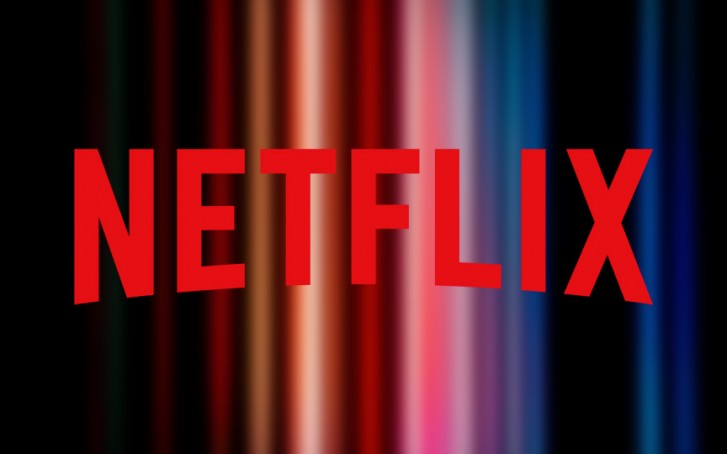

# **Project Summary -**


The objective of this project is to utilize NLP to cluster and analyze the Netflix dataset of movies and TV shows till 2019, sourced from Flixable. The goal is to enhance the user experience through a personalized recommendation system and reduce subscriber churn for Netflix, the world's largest online streaming service with over 220 million subscribers. In addition, the dataset will be examined to discover new insights and trends in the constantly evolving world of streaming entertainment.

**1** - Initially, we imported the required libraries and mounted the drive to store the dataset for meaningful analysis. Then, we proceeded to the first step of viewing and cleaning the data. In the second step, we performed data analysis and visualization using various techniques such as univariate, bivariate, and multivariate plots to understand the distribution of the data. We also conducted a multicollinearity check to identify any correlations among the variables.

**2**- we conducted three hypothesis tests to gain deeper insights into the relationships between variables in our dataset. Firstly, we compared means for two variables using the T-test. Secondly, we investigated the association between target age and country using the chi-square test. Lastly, we explored the association between target age and duration using the chi-square test.

**3**- we handled missing values in the dataset to ensure that the subsequent steps are not affected by possible errors. This involved replacing some missing values with "unknown", dropping some columns with high missing value percentages, and filling in other missing values with appropriate measures.

**4** In the fourth step of our project, we conducted feature engineering on the textual data by performing various tasks such as expanding contractions, converting text to lower case, removing punctuation marks and stopwords, normalizing the data, and vectorizing the text. Additionally, we performed data scaling using StandardScaler and carried out dimensionality reduction using PCA.

**5**  In the final phase of our project, we employed several clustering techniques such as the Elbow method, Silhouette score, Dendrogram, and others to create two unique types of clusters using K-Means Clustering and Agglomerative Hierarchical Clustering algorithms. Based on our analysis using the K-Means algorithm, we arrived at the optimal number of clusters for our dataset, which is 4.


Our project involved the development of a personalized recommendation system using the cosine similarity matrix, based on the content of shows previously watched by users. By analyzing user preferences, our system generates tailored recommendations to enhance the user experience, with the aim of reducing subscriber churn and improving user engagement for Netflix.











# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service's number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.
Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [3]:
# Import Libraries
# Import Libraries
# For data manipulation and visualisation
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
%matplotlib inline

import missingno as msno

import re
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
import nltk 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
nltk.download('stopwords')
import string
string.punctuation

from nltk.tokenize import TweetTokenizer
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.stem import LancasterStemmer, WordNetLemmatizer

from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples
import scipy.cluster.hierarchy as sch

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Dataset Loading

In [4]:
# Load Dataset
# Load Dataset
URL='https://drive.google.com/file/d/1xJGllnE12mAggLuRo8b0oNSshUlG8GvF/view?usp=share_link'
df= pd.read_csv('https://drive.google.com/uc?id='+URL.split('/')[-2])

### Dataset First View

In [5]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print(f"The total Number of rows and columns in dataset are: rows =  {df.shape[0]} ,columns= {df.shape[1]}")

The total Number of rows and columns in dataset are: rows =  7787 ,columns= 12


### Dataset Information

In [7]:
# Dataset Info
df.info()
     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

We have no duplicate observations in our dataset, which is excellent to see.

#### Missing Values/Null Values

In [9]:

# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
print("Percentage of null values in each variable: ")
Null_values = df.isnull().sum()/len(df)
print(f"{Null_values*100}%")   

Percentage of null values in each variable: 
show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64%


<Axes: >

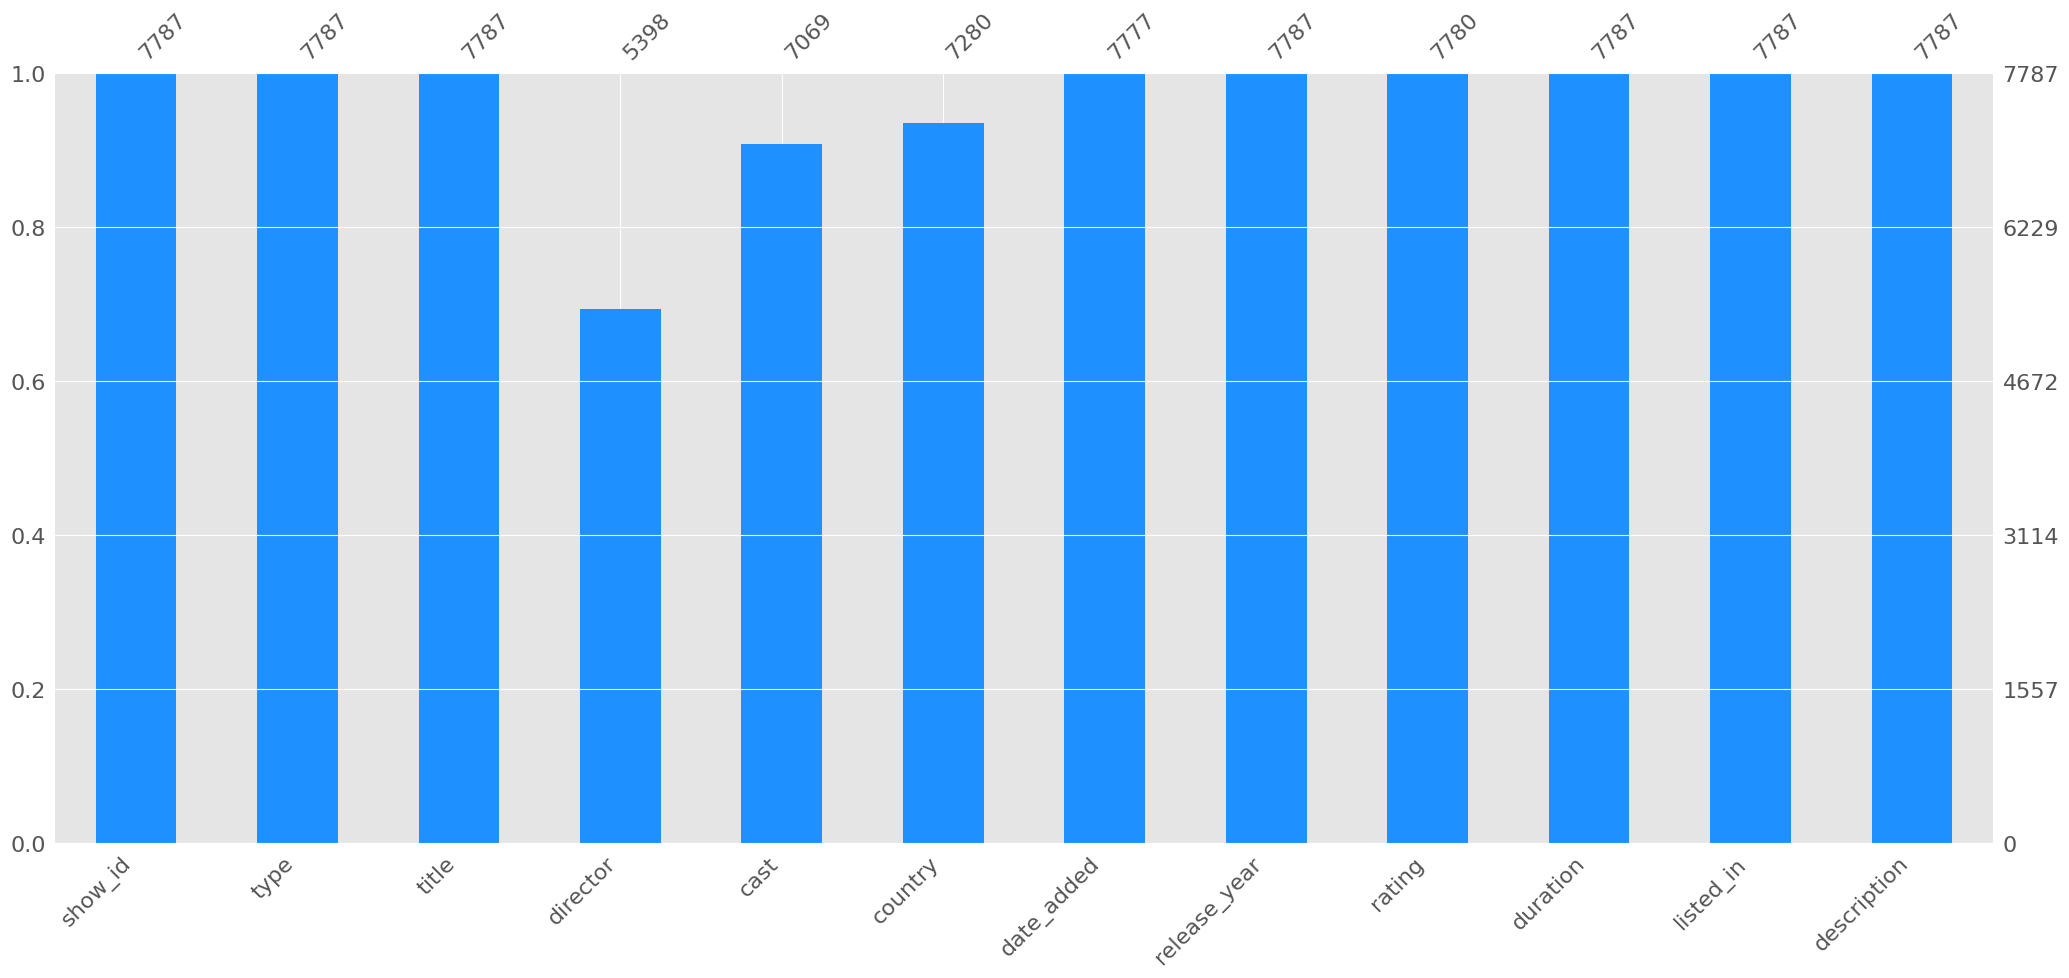

In [11]:
# Visualizing the missing values
msno.bar(df,color=("dodgerblue"))

### What did you know about your dataset?

The dataset contains 7787 rows and 12 columns, free from duplicate values, with the Director column having the highest percentage of null values at almost 30%, followed by cast and country columns with 9.2% and 6.7% null values, respectively; all columns are of object type, except for release_year which is an integer, making it the only numerical column in the dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [13]:
# Dataset Describe

styled_df = df.describe().style.background_gradient().set_properties(border='2px dashed blue', color='blue')
styled_df

### Variables Description 

**show_id** : Unique ID for every Movie / Tv Show

**type** :  Indicates whether the entry is a movie or a TV show.

**title** : Title of the Movie / Tv Show

**director** : Director of the Movie

**cast** : Actors involved in the movie / show

**country** : Country or countries where the movie or TV show was produced.

**date_added** : Date it was added on Netflix

**release_year** : Actual Releaseyear of the movie / show

**rating** : TV Rating of the movie / show

**duration** : Total Duration - in minutes or number of seasons

**listed_in** : Categories or genres of the movie or TV show.

**description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print('Total unique values in' ,i, "is", '-' , df[i].nunique())

Total unique values in show_id is - 7787
Total unique values in type is - 2
Total unique values in title is - 7787
Total unique values in director is - 4049
Total unique values in cast is - 6831
Total unique values in country is - 681
Total unique values in date_added is - 1565
Total unique values in release_year is - 73
Total unique values in rating is - 14
Total unique values in duration is - 216
Total unique values in listed_in is - 492
Total unique values in description is - 7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:


# Write your code to make your dataset analysis ready.
# imputing with unknown in null values of director and cast feature
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)

# Imputing null values of country with Mode
df['country']=df['country'].fillna(df['country'].mode()[0])

df.dropna(subset=['date_added','rating'],inplace=True)

In [16]:
# Rechecking the Missing Values/Null Values Count
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [17]:
# Extracting date, day, month and year from date_added column

# convert date_added to date time format.
df["date_added"] = pd.to_datetime(df['date_added'])
  
# Extract day. 
df['day_added'] = df['date_added'].dt.day   

# Extract year.         
df['year_added'] = df['date_added'].dt.year

# Extract mount.
df['month_added'] = df['date_added'].dt.month  

df.drop(['date_added'],axis=1,inplace=True)


# converting to integer 
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# fixing data types
Custom_rating = {'TV-MA':'Adult Content',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['ratings_cat'] = df['rating'].replace(to_replace = Custom_rating)
df['ratings_cat'].unique()

array(['Adult Content', 'Teen Content', 'Children Content', 'Not Rated',
       'Family-friendly Content'], dtype=object)

In [18]:
# Spearating the two columns 
movies= df[df['type']== 'Movie']
TvShows= df[df['type']== 'TV Show']

# Printing the shape
print(movies.shape, TvShows.shape)



(5372, 15) (2398, 15)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   int64 
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
 11  day_added     7770 non-null   int64 
 12  year_added    7770 non-null   int64 
 13  month_added   7770 non-null   int64 
 14  ratings_cat   7770 non-null   object
dtypes: int64(5), object(10)
memory usage: 971.2+ KB


### What all manipulations have you done and insights you found?



* We imputed the 'director' and 'cast' columns with the value 'Unknown', and the 'country' column with the mode value. Additionally, we decided to drop the null values in the 'date_added' and 'rating' columns, as they accounted for a relatively small percentage of the overall dataset.
* The datetime column was converted to a datetime format, and new columns were created to extract information such as day, month, and year from it.




*  Duration Manipulation:  Movies dataframe: duration is converted into integer

*  The rating column had a number of categories, therefore we divided it into 4 fundamental categories to make it easier to understand. i.e., Adult Content,Teen Content, Children Content, Not Rated, Family-friendly Content.




## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [20]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   
3          2009  PG-13        80   
4          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added    ratings_cat  
0            8  Adult Content  
1           12  Adult Content  
2           12  Adult Content  
3           11   Teen Content  
4            1   Teen Content

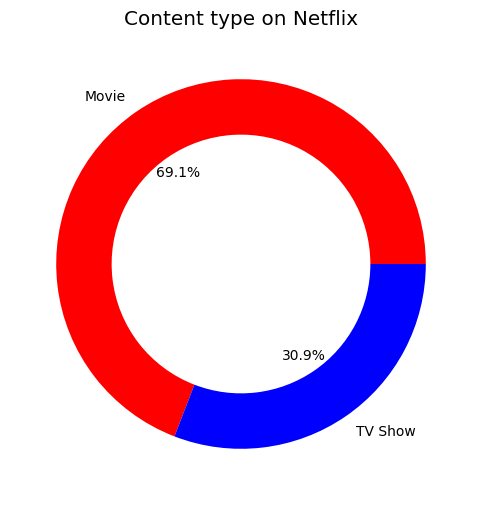

In [21]:
# Chart - 1 visualization code

type_counts = df['type'].value_counts()
# create donut chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(type_counts, labels=type_counts.index , wedgeprops=dict(width=0.3), autopct='%1.1f%%' ,colors = ['red', 'blue'])

# add chart title
ax.set_title('Content type on Netflix')

# add circle in center to create donut effect
circle = plt.Circle((0,0),0.4,color='white')
fig.gca().add_artist(circle)

# display chart
plt.show()


##### 1. Why did you pick the specific chart?

The percentage of TV series and movie data available in the Netflix Data set is displayed in this graph.

##### 2. What is/are the insight(s) found from the chart?


The Netflix dataset contains a larger percentage of movies (70%) compared to TV shows (30%).

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Promoting the production of TV shows could lead to better audience retention due to their longer duration and more complex storylines, and this is particularly important as there are relatively fewer TV shows available compared to movies. This presents a good opportunity for business growth.

#### Chart - 2

In [ ]:
df['ratings_cat'].value_counts()

Adult Content              3529
Teen Content               2314
Children Content           1284
Family-friendly Content     555
Not Rated                    88
Name: ratings_cat, dtype: int64

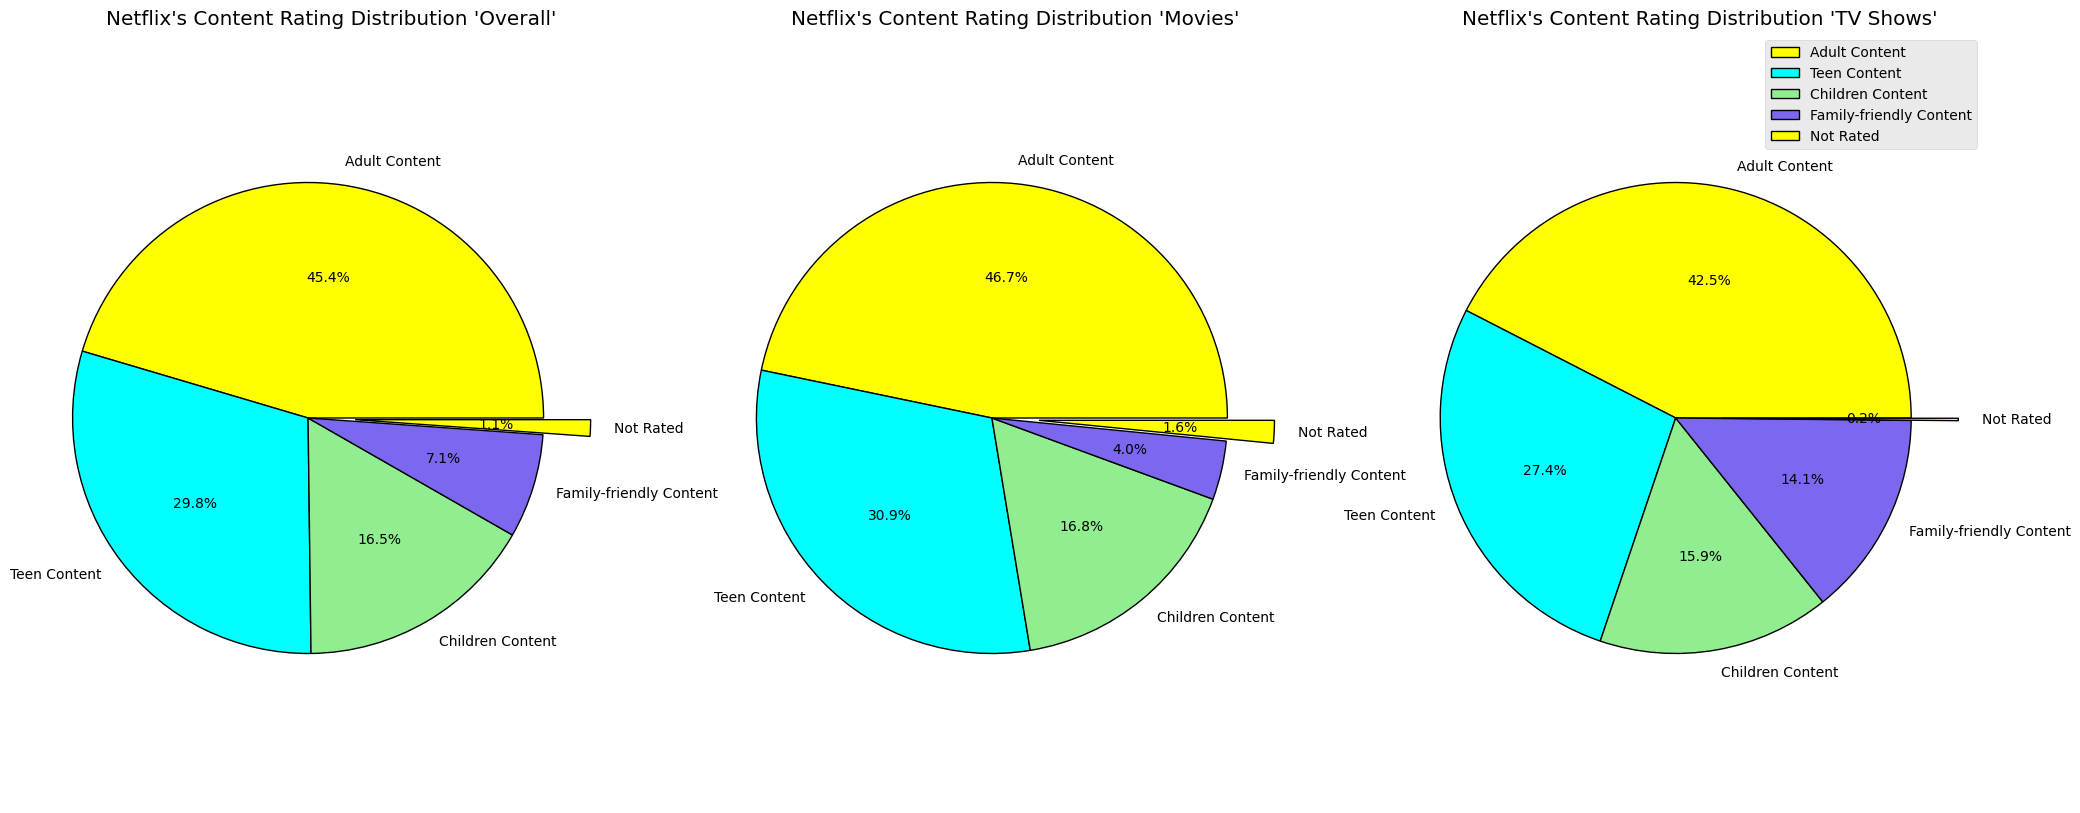

In [ ]:
# Chart - 2 visualization code

# create figure with subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

# loop through datasets and subplots
for i, j, k in zip([df, movies, TvShows], ['Overall', 'Movies', 'TV Shows'], range(3)):
    # count number of each content rating
    count = i['ratings_cat'].value_counts()

    # create pie chart
    axs[k].pie(count, labels=count.index, explode=(0, 0, 0, 0, 0.2),
               colors=['yellow', 'cyan', 'lightgreen', 'mediumslateblue', 'yellow'],
               autopct='%1.1f%%', labeldistance=1.1, wedgeprops={"edgecolor": "black", 'linewidth': 1, 'antialiased': True} )

    # set chart title and axis equal
    axs[k].set_title(f"Netflix's Content Rating Distribution '{j}'")
    axs[k].axis('equal')

# display charts
plt.legend()
plt.show()


##### 1. Why did you pick the specific chart?

We have taken this pie chart to show the percentage of type of content present in the Netflix.

##### 2. What is/are the insight(s) found from the chart?

We discovered that the Adult and Teen categories comprise the majority of the Netflix content.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To maximize profits, production houses should prioritize the production of Teen and Adult content, while also considering the potential for growth in the Family-friendly category for TV shows.

#### Chart - 3

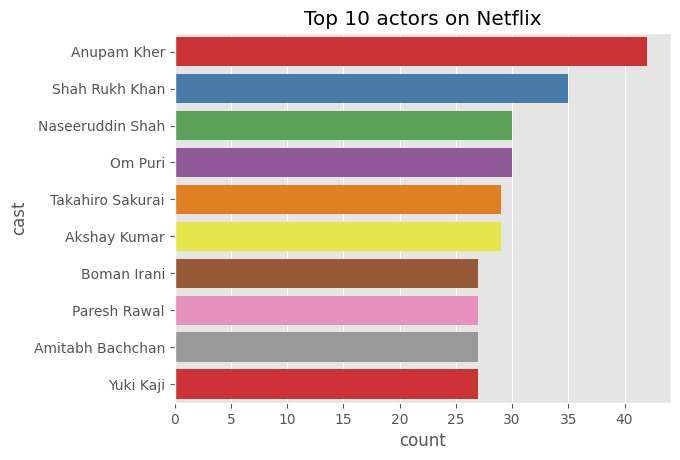

In [26]:
# Chart - 3 visualization code

actors = df.loc[df['cast'] != 'Unknown', 'cast'].str.split(', ')
actors_exploded = actors.explode().reset_index(drop=True)
top_actors = actors_exploded.value_counts()[:10].index.tolist()
sns.countplot(y=actors_exploded, order=top_actors, palette='Set1')
plt.title('Top 10 actors on Netflix')
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are effective tools for visualizing the distribution of dependent variables. They are particularly useful for comparing multiple categories or discrete variables with too many categories to compare. Vertical bar charts are a popular choice for this purpose.

##### 2. What is/are the insight(s) found from the chart?

The top 10 actors who have appeared in a lot of films and television programs are depicted in the graph above.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Given Indians' love for movies, it is advisable for businesses to focus on the Indian audience when promoting movies. Employing popular actors, who have a significant fan base and extensive experience, can enhance the chances of success.

#### Chart - 4

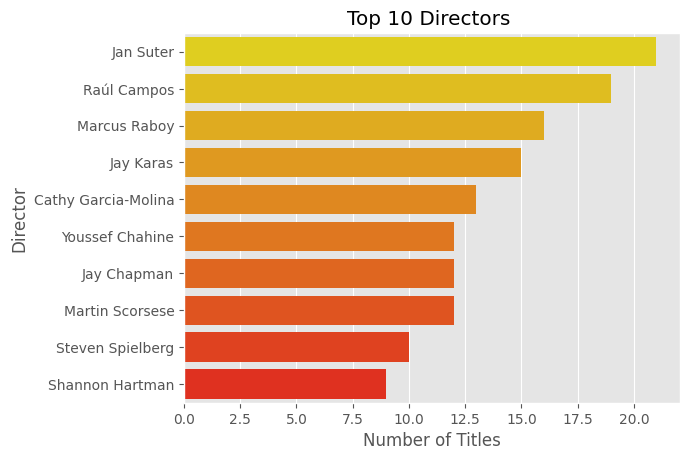

In [23]:
# Chart - 4 visualization code
directors = df[df.director != 'Unknown']['director'].str.split(', ').explode().value_counts()[:10]
sns.barplot(x=directors.values, y=directors.index, palette='autumn_r')
plt.title('Top 10 Directors ')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


##### 1. Why did you pick the specific chart?

We have picked this chart to show that which director is popular in Movies and which one is popular in TV Shows.

##### 2. What is/are the insight(s) found from the chart?

The visualization indicates that Jan Suter and Raul Campos are the top directors, who have extensive experience in their field.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Casting well-known actors may be advantageous due to their extensive fanbase and expertise.

#### Chart - 5

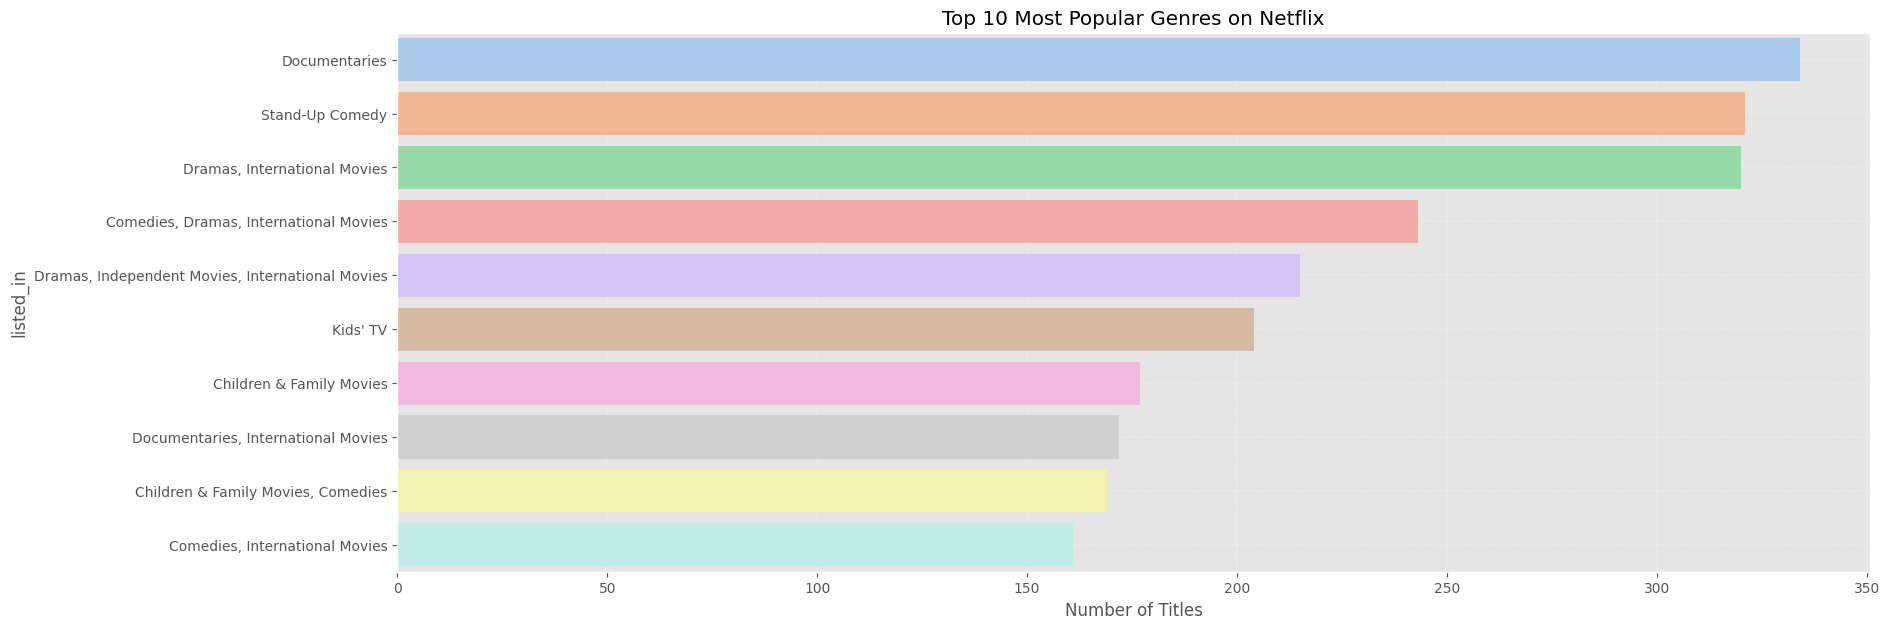

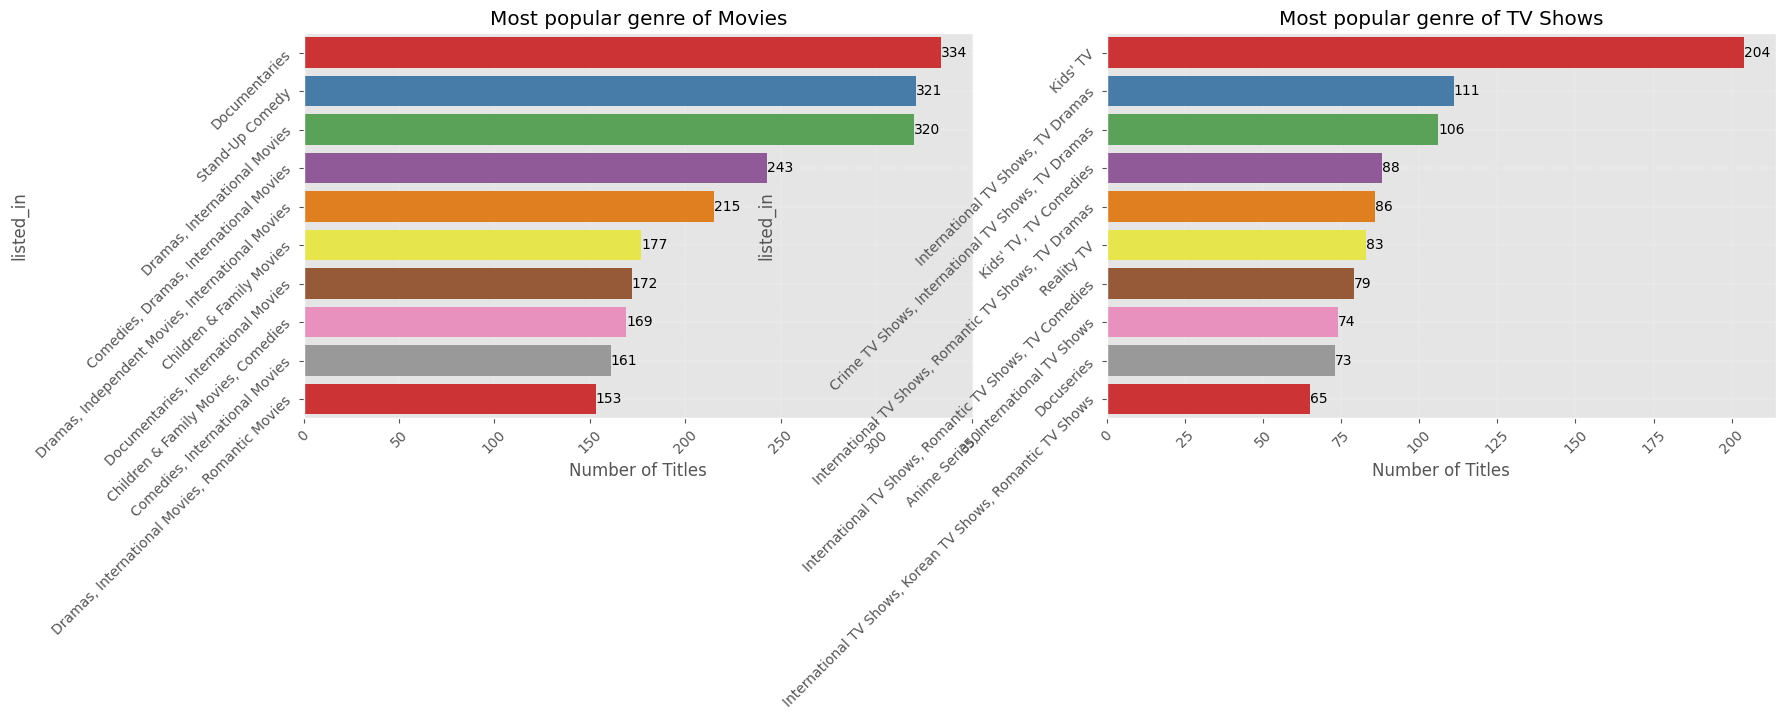

In [ ]:
plt.figure(figsize=(19, 7))
top_genres = df.groupby('listed_in').title.nunique().sort_values(ascending=False)[:10]
plots = sns.barplot(y=top_genres.index, x=top_genres.values, palette='pastel')
plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.grid(linestyle='--', linewidth=0.3)
plt.show()


plt.figure(figsize=(19,5))
data = [(movies, 'Movies'), (TvShows, 'TV Shows')]
for i, (df, title) in enumerate(data):
    plt.subplot(1,2, i+1)
    df_genre = df.groupby(['listed_in']).agg(num_titles=('title', 'nunique')).reset_index().nlargest(10, 'num_titles')
    plots= sns.barplot(y='listed_in', x='num_titles', data=df_genre, palette='Set1')
    plt.title(f'Most popular genre of {title}')
    plt.xlabel('Number of Titles')
    plt.grid(linestyle='--', linewidth=0.2)
    plots.bar_label(plots.containers[0])
    plt.yticks(rotation = 45)
    plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

Here we have picked this Chart to analyze the genere on Netflix 

##### 2. What is/are the insight(s) found from the chart?



*   The majority of Netflix movies' genres are documentaries.
*   The most popular category of Netflix TV series is kids TV.




##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By leveraging the insights gained from analyzing audience preferences, Netflix can optimize its content acquisition and production strategies to align with viewers' preferences, leading to higher engagement and customer satisfaction. Ultimately, this can have a positive impact on Netflix's business and help the platform stay competitive in the ever-evolving streaming landscape. Additionally, genre preferences can help inform marketing and advertising strategies to better reach and appeal to the target audience.


#### Chart - 6

In [ ]:
df['type']== 'movies'

0       False
5       False
11      False
12      False
16      False
        ...  
7767    False
7775    False
7777    False
7779    False
7785    False
Name: type, Length: 2398, dtype: bool

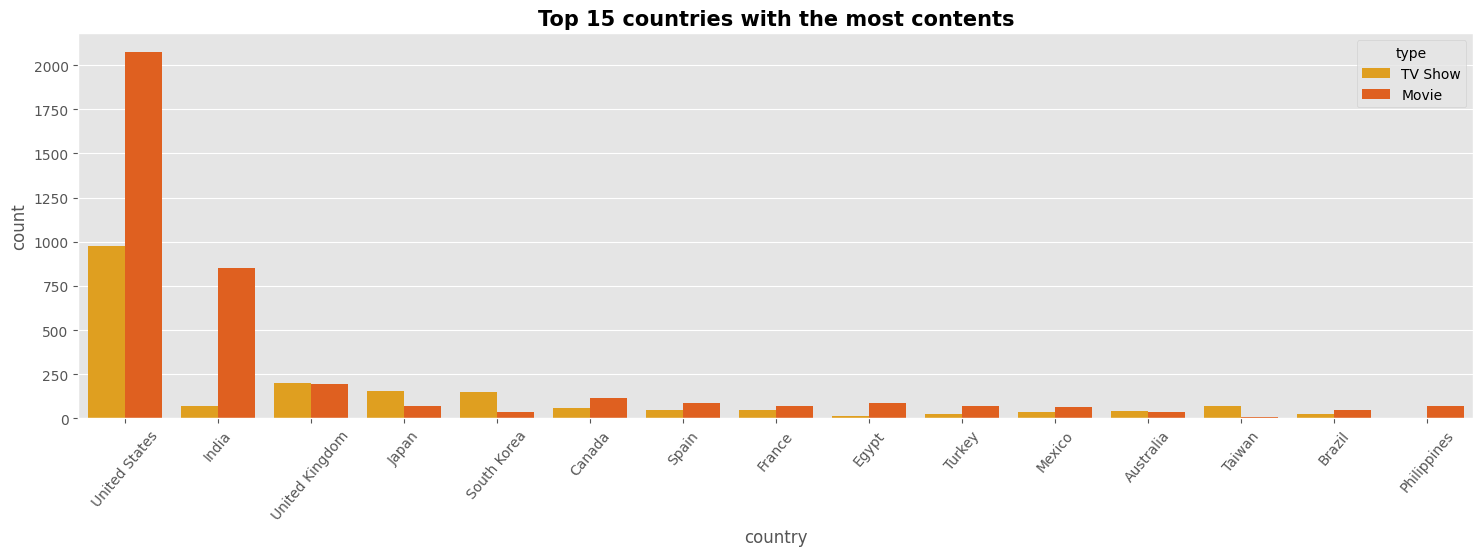

In [ ]:
# Chart - 6 visualization code

top15_countries = df['country'].value_counts().head(15).index.tolist()
plt.figure(figsize=(18, 5))
sns.countplot(x='country', data=df[df['country'].isin(top15_countries)], order=top15_countries, hue='type', palette='autumn_r')
plt.xticks(rotation=50)
plt.title('Top 15 countries with the most contents', fontsize=15, fontweight='bold')
plt.show()


##### 1. Why did you pick the specific chart?

This graph has been drawn so that you can see when the number of movies and television shows added is at its highest and lowest.

##### 2. What is/are the insight(s) found from the chart?

The country with the most content on Netflix is the United States, with India coming in second. India has a higher number of movie productions than TV shows, while Japan and South Korea have more TV show productions than movies. 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

The obtained insights have the potential to benefit Netflix's business by identifying prospects for development and expansion. For instance, Netflix could consider increasing its portfolio of Indian movies and Japanese and South Korean TV shows to capitalize on these opportunities.

#### Chart - 7

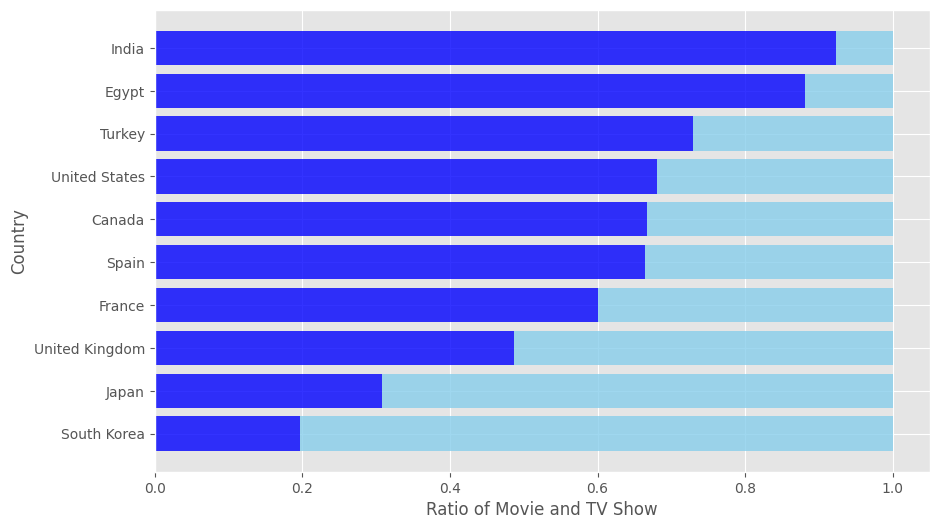

In [54]:
# Select the top 10 countries with the most content
country_order = df['country'].value_counts().nlargest(10).index

# Group the data by country and count the number of movies and TV shows
Top_10_country = df[df['country'].isin(country_order)].groupby(['country', 'type'])['type'].count().unstack()

# Calculate the total number of content for each country
Top_10_country['total'] = Top_10_country.sum(axis=1)

# Calculate the ratio of movie and TV show for each country
content_data_ratio = Top_10_country[['Movie', 'TV Show']].div(Top_10_country['total'], axis=0).sort_values(by='Movie', ascending=False)[::-1]

# Plot the horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(content_data_ratio.index, content_data_ratio['Movie'], color='blue', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], color='skyblue', alpha=0.8, label='TV Show')
ax.set_xlabel('Ratio of Movie and TV Show')
ax.set_ylabel('Country')
plt.show()


##### 1. Why did you pick the specific chart?

When you need to convey a considerable amount of data in a limited space, multiple bar charts are an effective solution as they enable you to display several bars at each interval on the x-axis, allowing for a comprehensive presentation of information.

##### 2. What is/are the insight(s) found from the chart?




*   The leading country producing Netflix movies and TV shows is the United States. This shows that Netflix has a strong American content influence. Change the wording of this statement. 
*  Bollywood movies are becoming increasingly popular all around the world, as evidenced by the fact that India is the second-highest producer of films on Netflix.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

India has a relatively low number of TV shows compared to other countries, indicating that there is an opportunity to fill this gap by producing more TV shows that originate in India.

#### Chart - 8

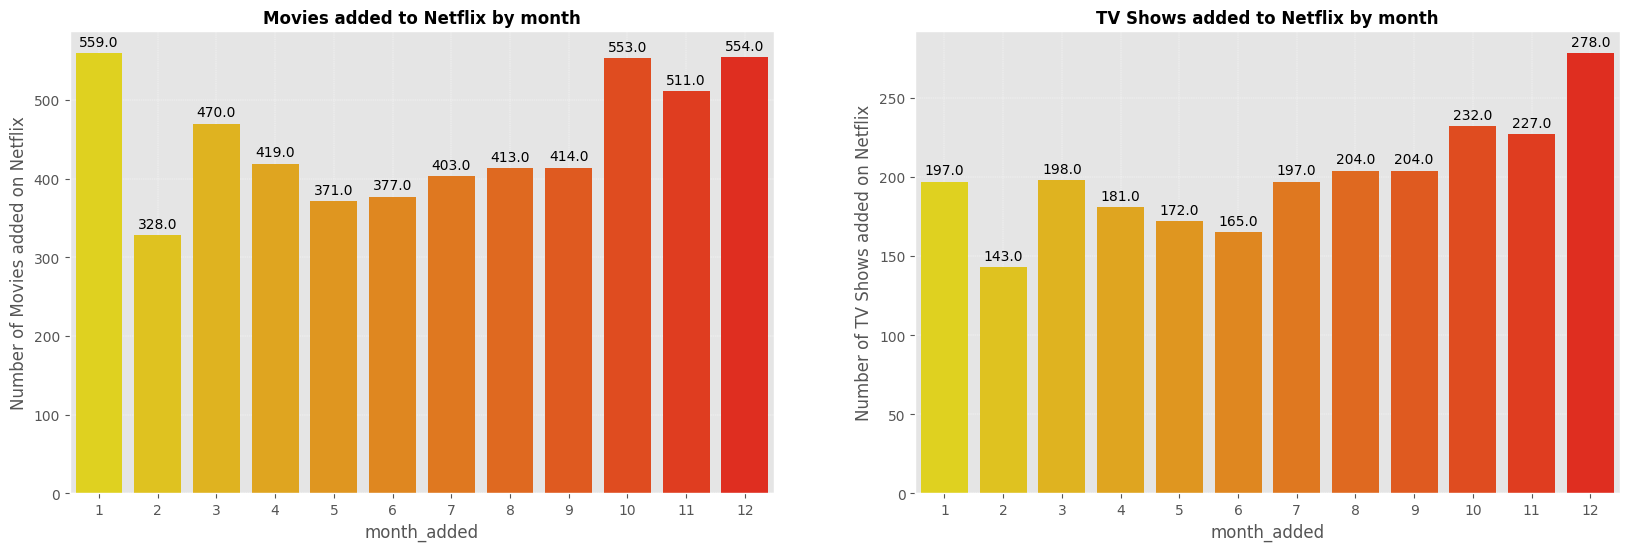

In [ ]:
# Chart - 8 visualization code

# Create a list of dataframes and content types
data = [(movies, 'Movies'), (TvShows, 'TV Shows')]

# Create subplots for each content type
fig, axs = plt.subplots(nrows=1, ncols=len(data), figsize=(20, 6))

# Loop through the data and create a bar plot for each content type
for i, (df, content_type) in enumerate(data):
    df_month = df.groupby(['month_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['month_added'],ascending=False)
    sns.barplot(x = 'month_added',y='title', data = df_month, palette='autumn_r', ax=axs[i])
    axs[i].set_title(f'{content_type} added to Netflix by month', fontsize=12, fontweight='bold')
    axs[i].set_ylabel(f"Number of {content_type} added on Netflix")
    axs[i].grid(linestyle='--', linewidth=0.3)
    for bar in axs[i].patches:
        axs[i].annotate(bar.get_height(),
                        (bar.get_x() + bar.get_width() / 2,
                         bar.get_height()), ha='center', va='center',
                        size=10, xytext=(0, 8),
                        textcoords='offset points')
    axs[i].set_xticklabels(axs[i].get_xticklabels())

plt.show()


##### 1. Why did you pick the specific chart?

There we have taken this graph to demonstrate which month added the most movies and TV shows, as well as which year added the least.

##### 2. What is/are the insight(s) found from the chart?





*  We discovered that the most common months for new TV show additions are October, November, and December.
*  The addition of movies is most popular during the months of January, October, November, and December.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the most popular months for new content additions, Netflix can leverage this insight to strategically plan content releases during peak periods. This could potentially lead to higher user engagement and retention, resulting in a positive impact on the company's business.







#### Chart - 9

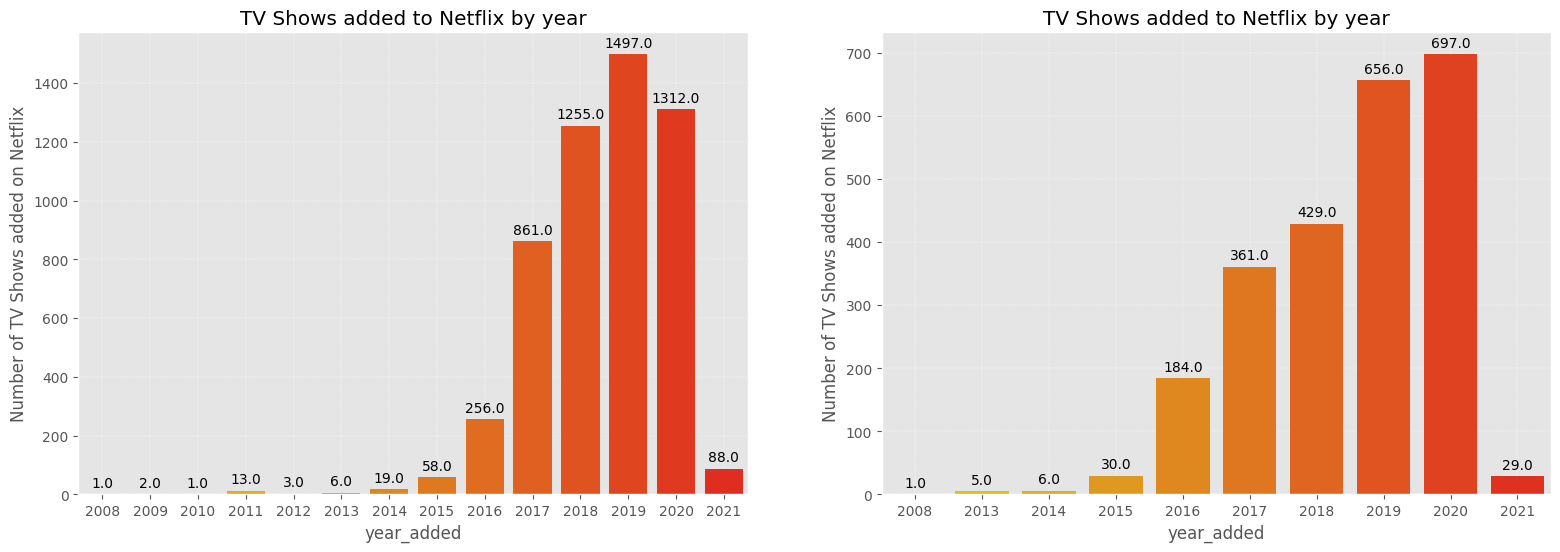

In [ ]:
plt.figure(figsize=(19,6))
for a,b,c in ((movies, 'Movies',0),(TvShows, 'TV Shows',1)):
  plt.subplot(1,2,c+1)
  df_year = a.groupby(['year_added']).agg({'title':'nunique'}).reset_index().sort_values(by=['year_added'],ascending=False)
  plots= sns.barplot(x = 'year_added',y= 'title', data = df_year, palette='autumn_r')
  plt.title(f'{j} added to Netflix by year')
  plt.ylabel(f"Number of {j} added on Netflix")
  plt.grid(linestyle='--', linewidth=0.3)

  for bar in plots.patches:
     plots.annotate(bar.get_height(),
                    (bar.get_x() + bar.get_width() / 2,
                     bar.get_height()), ha='center', va='center',
                    size=10, xytext=(0, 8),
                    textcoords='offset points')
plt.show()


##### 1. Why did you pick the specific chart?

This graph displays the number of new Netflix movies and TV series that are added each year.

##### 2. What is/are the insight(s) found from the chart?

Although the number of movies and TV shows added on Netflix has been growing steadily each year, there has been a significant shift since 2018, with a decrease in the number of movies and an increase in the number of TV shows. However, there was a sudden decrease in 2021, which can be attributed to the COVID-19 pandemic and resulting lockdown measures.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To prevent any possible negative consequences, Netflix can consider implementing strategies that broaden its content selection and adjust to shifting consumer preferences. These strategies might involve allocating resources towards producing a variety of content types, such as movies, TV shows, documentaries, limited series, and stand-up comedy specials. By expanding its content offerings, Netflix can appeal to a wider range of viewers and sustain its position in the constantly evolving streaming industry.

#### Chart - 10

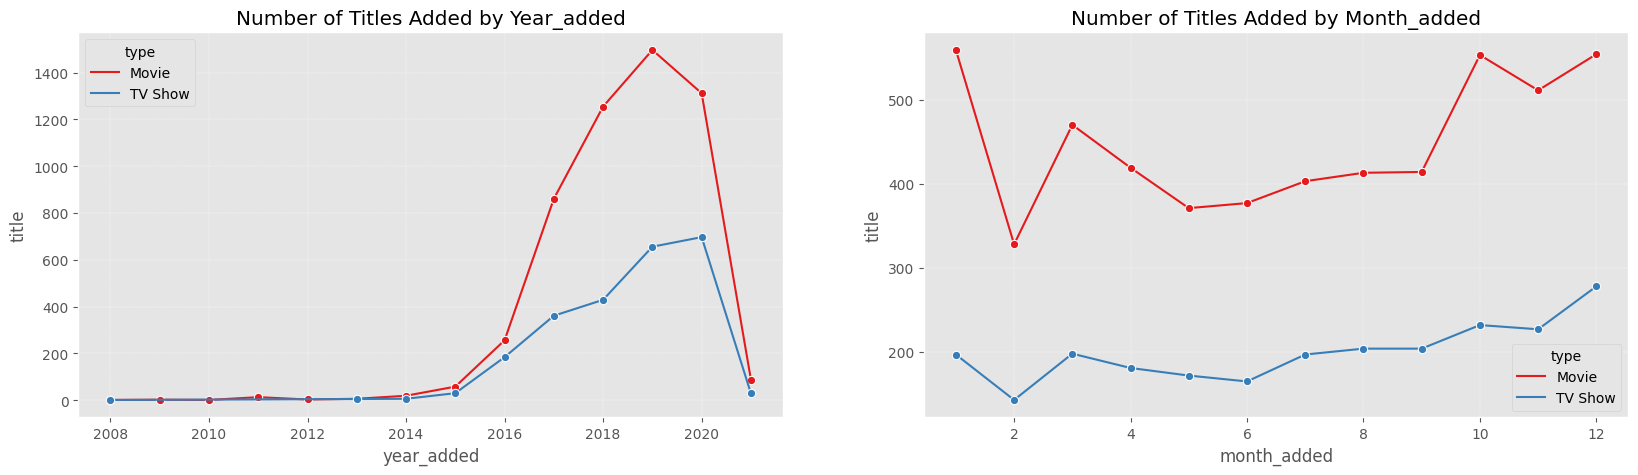

In [ ]:
# Chart - 10 visualization code
interval = ['year_added', 'month_added']

fig, axes = plt.subplots(1, len(interval), figsize=(20, 5))

for i, col in enumerate(interval):
  df_interval = df.groupby([col, 'type'])['title'].nunique().reset_index()
  sns.lineplot(x=col, y='title', hue='type', marker='o', data=df_interval, palette='Set1', ax=axes[i])
  axes[i].set_title(f'Number of Titles Added by {col.capitalize()}')
  axes[i].grid(linestyle='--', linewidth=0.3)

plt.show()


##### 1. Why did you pick the specific chart?


This graph shows us the variation of Movies/TV Shows added in month,Year.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

*   It can be observed that the addition of movies on Netflix experienced a sharp and continuous increase during the year 2019, particularly during the COVID-19 period, ultimately reaching its peak.
*  The number of movies and TV shows added to Netflix is highest during the weekends, with a notable spike occurring on the sixth day of the week.



##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

To maximize audience engagement, producers should consider uploading their movies during months when viewers are most receptive. Although no discernible trend is evident, it may be beneficial to release a larger number of movies towards the end of the year, potentially accompanied by subscription discounts to encourage viewership.

#### Chart - 11

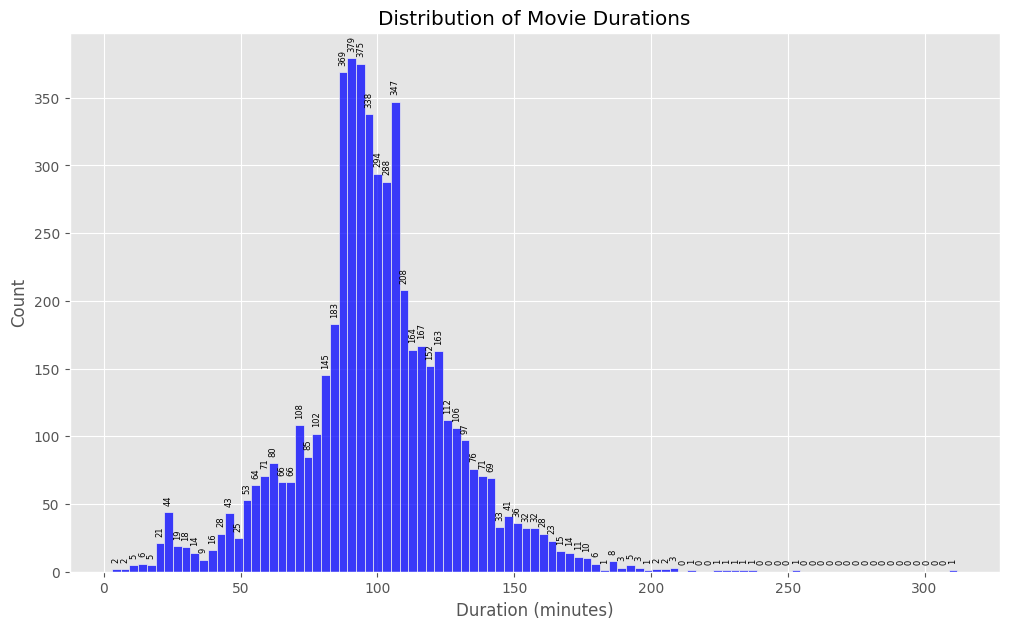

In [ ]:
# create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 7))

# plot the distribution of movie durations
sns.histplot(data=movies, x='duration', kde=False, color='blue', ax=ax)

# set the title and axis labels
ax.set(title='Distribution of Movie Durations', xlabel='Duration (minutes)', ylabel='Count')

# annotate the bars with their heights
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{height}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 5),
                textcoords='offset points',
                ha='center', va='bottom', size=6, rotation=90)

# show the plot
plt.show()


##### 1. Why did you pick the specific chart?

There we have picked this plot to check the duration distribution for Movies on Netflix.

The distribution plot of Netflix movie durations in minutes indicates that most movies on the platform fall within the 80-120 minute range.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

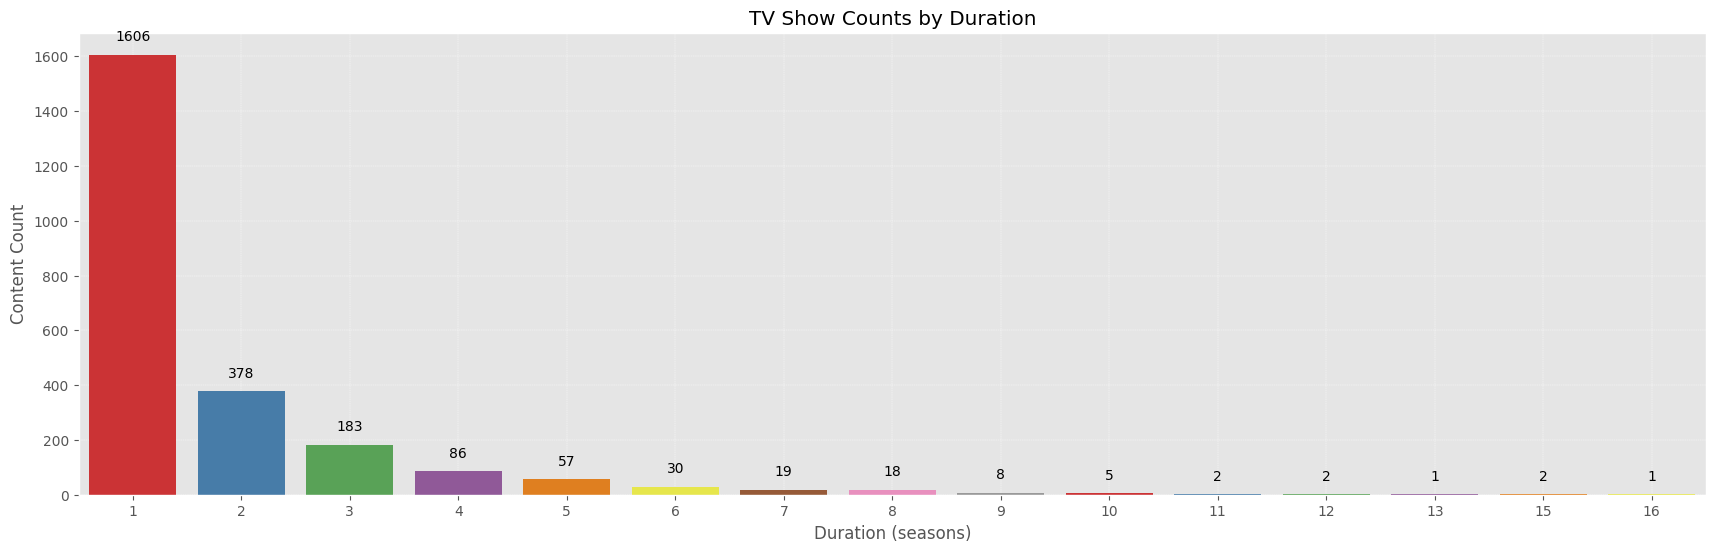

In [ ]:
# Chart - 12 visualization code
# group TV shows by duration and count the unique titles
df_duration = TvShows.groupby('duration')['title'].nunique().reset_index()

# create a figure and axis object
fig, ax = plt.subplots(figsize=(21, 6))

# plot a bar chart of the TV show counts by duration
sns.barplot(x='duration', y='title', data=df_duration, palette='Set1', ax=ax)

# set the title and axis labels
ax.set(title='TV Show Counts by Duration', xlabel='Duration (seasons)', ylabel='Content Count')
ax.grid(linestyle='--', linewidth=0.3)

# annotate the bars with their heights
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 8),
                textcoords='offset points',
                ha='center', va='bottom', size=10)

# show the plot
plt.show()


##### 1. Why did you pick the specific chart?

There we have picked this plot to check the duration distribution for  TV Shows on Netflix.

##### 2. What is/are the insight(s) found from the chart?

The majority of TV shows on Netflix consist of a single season, with the frequency of shows gradually decreasing as the number of seasons increases.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

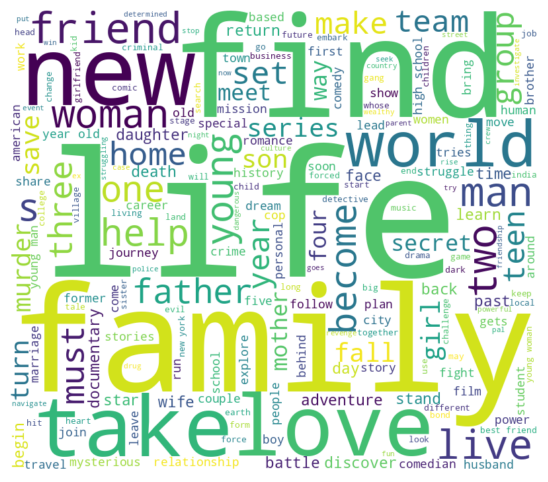

In [ ]:
# Chart - 13 visualization code
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df= pd.read_csv('https://drive.google.com/uc?id='+URL.split('/')[-2])

# Concatenate all the movie descriptions into a single string
all_descriptions = " ".join(df["description"].astype(str).str.lower())

# Create a WordCloud object with some settings
wordcloud = WordCloud(width=800, height=700, 
                      background_color="white", 
                      stopwords=STOPWORDS, 
                      min_font_size=10).generate(all_descriptions)

# Display the WordCloud image
plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


##### 1. Why did you pick the specific chart?

Word clouds are a graphical way to depict a body of text where the size of each word corresponds to its frequency in the text. This method is particularly useful for analyzing unstructured data, such as text documents, as it allows patterns and trends to be identified visually.

##### 2. What is/are the insight(s) found from the chart?

The most often used terms in the description column are family, life, find, and love.

#### Chart - 14 - Correlation Heatmap

In [ ]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

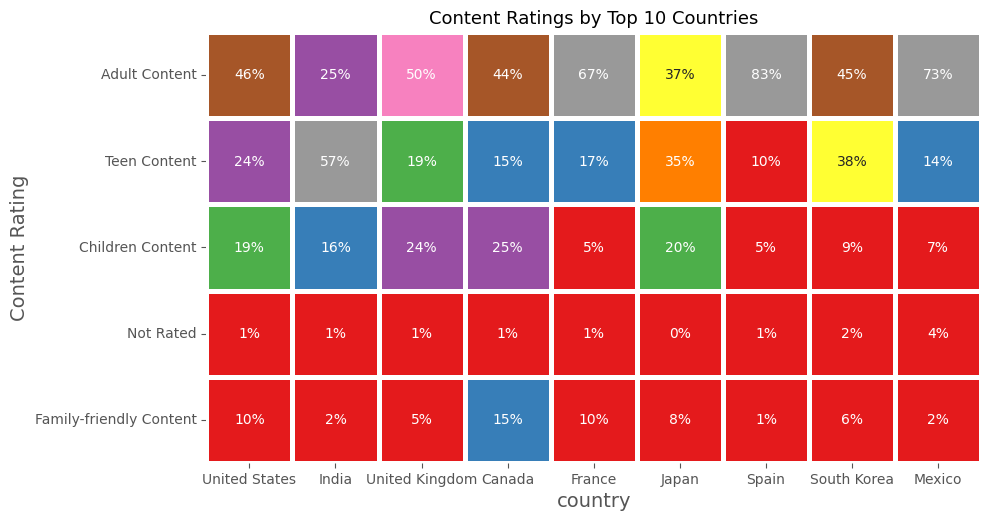

In [ ]:
# Group the data by country and count the number of entries
data = df.groupby('country').size().sort_values(ascending=False).reset_index(name='count')[:10]
country_list = data['country'].tolist()

# Filter the DataFrame to only include data for the top 10 countries
df_heatmap = df[df['country'].isin(country_list)]

# Get the unique content ratings from the filtered DataFrame
Ratings = df_heatmap['ratings_cat'].unique()

# Create a pivot table of content ratings by country
df_heatmap = pd.crosstab(df_heatmap['ratings_cat'], df_heatmap['country'], normalize='columns')

# Define the order of the countries
country_order = ['United States','India','United Kingdom','Canada','France','Japan','Spain','South Korea', 'Mexico']

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.heatmap(df_heatmap.loc[Ratings, country_order], cmap='Set1', cbar=False, annot=True,square=True, linewidths=2.5 , fmt='1.0%', vmax=.6, vmin=0.05, ax=ax, annot_kws={"fontsize": 10})
ax.set_title("Content Ratings by Top 10 Countries", fontsize=13)
ax.set_xlabel("country", fontsize=14)
ax.set_ylabel("Content Rating", fontsize=14)
plt.show()






##### 1. Why did you pick the specific chart?

We have picked this  graph demonstrates which countries produce various kind of information most frequently.

##### 2. What is/are the insight(s) found from the chart?







*   India has relatively fewer options in the adult category compared to the teen category
*  Spain, on the other hand, has a higher proportion of adult content, accounting for 83% of their content

*  When it comes to Canada, a larger proportion of their content is geared towards children and family-friendly audiences.



##### 2. What is/are the insight(s) found from the chart?

To optimize their audience engagement, companies should tailor their content offerings to align with the preferences of each country's audience.

#### Chart - 15 - Pair Plot 

<Figure size 800x800 with 0 Axes>

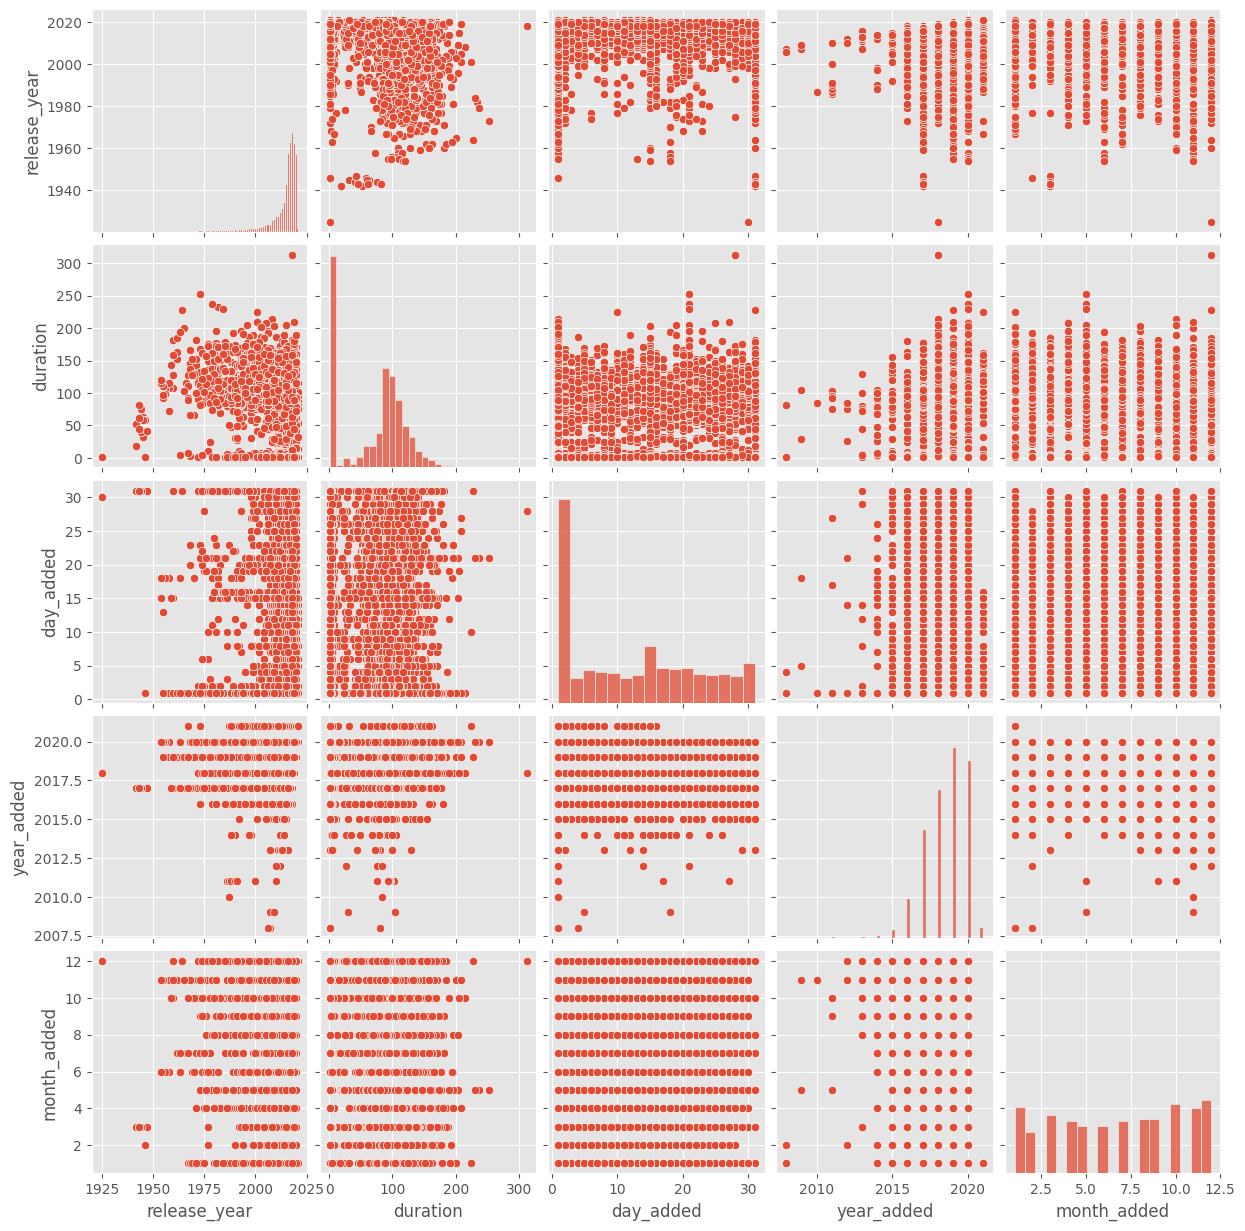

In [ ]:
# Pair Plot visualization code
plt.figure(figsize=(8, 8))
sns.pairplot(data=df, palette='Set1')

##### 1. Why did you pick the specific chart?


Pair plot is a useful tool in data analysis and visualization to explore the pairwise relationships between different variables in a dataset. It can help identify patterns, correlations, and clusters of data points, and assist in selecting the most relevant features for further analysis or modeling.

##### 2. What is/are the insight(s) found from the chart?

There is no evidence of any relationship or trends between movie release and days/months based on the pairplots.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

**Hypothetical Statement 1:**

* Null Hypothesis: The average runtime of TV shows added to Netflix in the year 2020 and 2021 is not noticeably different from one another.



* Alternative Hypothesis: The average runtime of Netflix TV shows added in the year 2020 differs significantly from that of programs added in the year 2021.

**Hypothetical Statement 2:**
*  Null Hypothesis: The proportion ratings of drama and comedy films on Netflix do not differ much from one another.

*  Alternative Hypothesis: On Netflix, the ratings for comedy and drama films are significantly different from one another.


**Hypothetical Statement 3:**
*  Null Hypothesis: There is no significant distinction between Netflix's proportion ratings for drama and comedic films.

* Alternative Hypothesis: On Netflix, the ratings for comedy and drama films are significantly different from one another.









### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Hypothetical Statement 1:**

* Null Hypothesis: The average runtime of TV shows added to Netflix in the year 2020 and 2021 is not noticeably different from one another.



* Alternative Hypothesis: The average runtime of Netflix TV shows added in the year 2020 differs significantly from that of programs added in the year 2021.


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import ttest_ind

# separate the data into two groups
group_1 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]['duration'].astype(int)
group_2 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]['duration'].astype(int)

# perform two-sample t-test
t_statistic, p_value = ttest_ind(group_1, group_2, equal_var=False)

# print the results
if p_value < 0.05:
    print(f"The p-value is {p_value:.4f}, which is less than 0.05. Therefore, we reject the null hypothesis that the means of the two groups are equal.")
else:
    print(f"The p-value is {p_value:.4f}, which is greater than 0.05. Therefore, we fail to reject the null hypothesis that the means of the two groups are equal.")


The p-value is 0.6141, which is greater than 0.05. Therefore, we fail to reject the null hypothesis that the means of the two groups are equal.


##### Which statistical test have you done to obtain P-Value?

A two-sample t-test was performed as the statistical analysis to determine the P-Value.

##### Why did you choose the specific statistical test?

We opted for a two-sample t-test because our aim was to compare the means of two distinct samples (i.e., TV shows added in 2020 versus TV shows added in 2021) and establish whether there is a significant difference between them. Furthermore, we assumed that the variances of the two samples are unequal since it's improbable for the duration of TV shows added in 2020 and 2021 to possess the exact same variance.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.


**Hypothetical Statement 2:**

*  Null Hypothesis: The proportion ratings of drama and comedy films on Netflix do not differ much from one another.

*  Alternative Hypothesis: On Netflix, the ratings for comedy and drama films are significantly different from one another.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Calculate the proportion of TV shows and movies produced in the United States
tv_proportion = np.sum(TvShows['country'].str.contains('United States')) / len(TvShows)
movie_proportion = np.sum(movies['country'].str.contains('United States')) / len(movies)

# Set up the parameters for the z-test
tv_count = int(tv_proportion * len(TvShows))
movie_count = int(movie_proportion * len(movies))
tv_nobs = len(TvShows)
movie_nobs = len(movies)
count = np.array([tv_count, movie_count])
nobs = np.array([tv_nobs, movie_nobs])
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print("Reject the null hypothesis. The proportion of TV shows and movies produced in the United States on Netflix is significantly different.")
else:
    print("Fail to reject the null hypothesis. The proportion of TV shows and movies produced in the United States on Netflix is not significantly different.")


z-statistic:  -1.7003166705309463
p-value:  0.08907137640581508
Fail to reject the null hypothesis. The proportion of TV shows and movies produced in the United States on Netflix is not significantly different.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

This particular statistical test was selected because it is suitable for comparing two proportions, and it assists us in determining whether the observed difference between the two proportions is statistically significant or simply due to random chance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.








*  Null Hypothesis: There is no significant distinction between Netflix's proportion ratings for drama and comedic films.

* Alternative Hypothesis: On Netflix, the ratings for comedy and drama films are significantly different from one another.



#### 2. Perform an appropriate statistical test.

In [ ]:

# Subset the data to only include drama and comedy movies
subset = df[df['listed_in'].str.contains('Dramas') | df['listed_in'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['listed_in'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['listed_in'].str.contains('Comedies')]) / len(subset)

# Set up the contingency table
observed = [[int(drama_prop * len(subset)), int(comedy_prop * len(subset))],
            [len(subset) - int(drama_prop * len(subset)), len(subset) - int(comedy_prop * len(subset))]]

# Perform the chi-square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(observed)

print('chi-square statistic: ', chi2_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the chi-square test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.  ")


chi-square statistic:  319.4944708208456
p-value:  1.8664514958743852e-71
Reject the null hypothesis.


Based on the statistical analysis conducted, we have sufficient evidence to reject the null hypothesis and conclude that there is a statistically significant difference in the proportion ratings of drama and comedy movies on Netflix. In other words, the proportions of drama and comedy movies on Netflix are not equal and the difference is not due to chance.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.

##### Why did you choose the specific statistical test?

The z-test for proportions was an appropriate choice of statistical test in this scenario because we are comparing the proportions of two categorical variables (drama and comedy movies) within a single sample. This test allows us to determine whether the difference between the two proportions is statistically significant, indicating that the proportions of these movie categories on Netflix are not equal.

## ***6. Feature Engineering & Data Pre-processing***

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   release_year  7770 non-null   int64 
 7   rating        7770 non-null   object
 8   duration      7770 non-null   int64 
 9   listed_in     7770 non-null   object
 10  description   7770 non-null   object
 11  day_added     7770 non-null   int64 
 12  year_added    7770 non-null   int64 
 13  month_added   7770 non-null   int64 
 14  ratings_cat   7770 non-null   object
dtypes: int64(5), object(10)
memory usage: 971.2+ KB


### 1. Handling Missing Values

In [22]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
day_added       0
year_added      0
month_added     0
ratings_cat     0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

Let's proceed with the analysis since we have already addressed any null or missing values in our dataset.

### 2. Handling Outliers

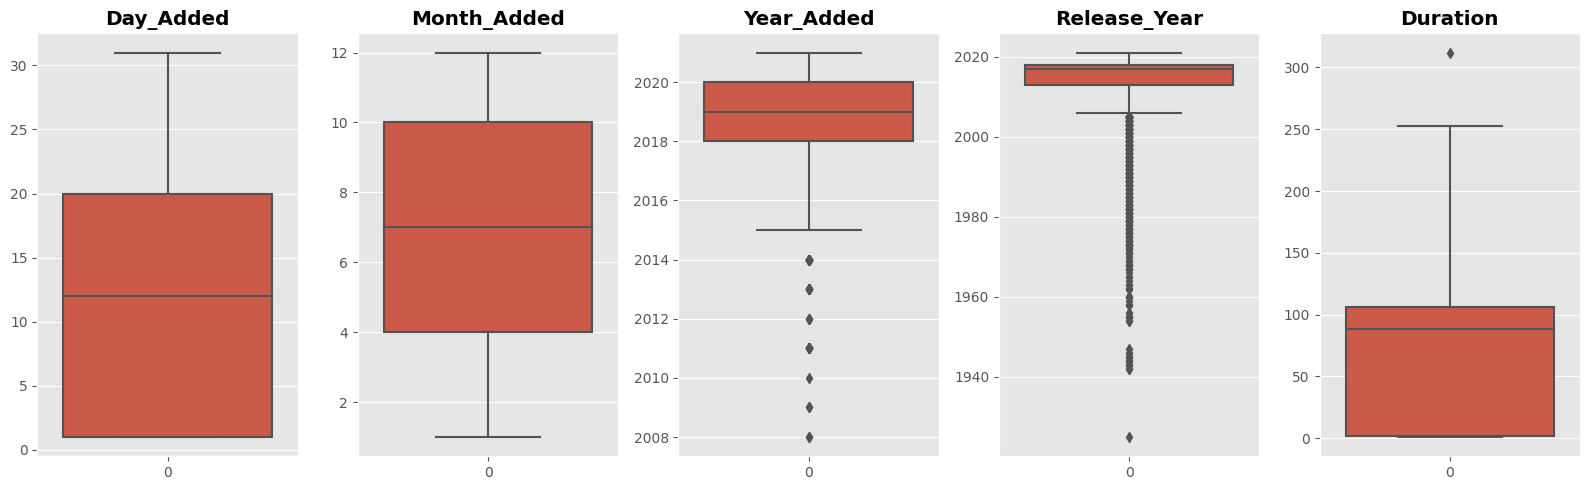

In [23]:
# Handling Outliers & Outlier treatments

# Define a function to detect and handle outliers using the IQR method
def handle_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].apply(lambda x: max(lower_bound, min(upper_bound, x)))

# Store the continuous value features in a list
continuous_features = ["day_added", "month_added", "year_added", "release_year", "duration"]

# Visualize and handle outliers using the IQR method
plt.figure(figsize=(16,5))
for n, column in enumerate(continuous_features):
    plt.subplot(1, 5, n+1)
    sns.boxplot(df[column])
    plt.title(f'{column.title()}',weight='bold')
    handle_outliers(df, column)
plt.tight_layout()


Even though we observe some anomalies in the continuous feature columns through box plots, we have decided not to handle them as they may not necessarily be outliers, but instead reflect early release or addition dates for certain Movies/TV Shows on Netflix.

##### What all outlier treatment techniques have you used and why did you use those techniques?

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [24]:
df.shape

(7770, 15)

In [25]:
# Expand Contraction


# Create a new dataframe with the required columns
New_data = df[['title']]

# Expand contractions in the description column
#df['description'] = df['description'].apply(lambda x: contractions.fix(x))

# Combine all relevant columns into a single column
New_data['content_df'] = df['description'] + ' ' + df['listed_in'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['rating']

# Set the index to be the title column
New_data.set_index('title', inplace=True)

# Display the first five rows of the dataframe
New_data.head()


content_df
title                                                   
3%     In a future where the elite inhabit an island ...
7:19   After a devastating earthquake hits Mexico Cit...
23:59  When an army recruit is found dead, his fellow...
9      In a postapocalyptic world, rag-doll robots hi...
21     A brilliant group of students become card-coun...

#### 2. Lower Casing

In [26]:
# Lower Casing
New_data['content_df']= New_data['content_df'].str.lower()

In [27]:
New_data.head()

content_df
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead, his fellow...
9      in a postapocalyptic world, rag-doll robots hi...
21     a brilliant group of students become card-coun...

#### 3. Removing Punctuations

In [28]:
# Remove Punctuations
import string

def remove_punctuations(text):
    """
    This function removes the punctuation marks from the given sentence and returns the cleaned sentence.
    """
    # Create a translation table with all punctuation marks replaced by None
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    # Translate the text using the translation table
    text = text.translate(translator)
    return text


In [29]:
# Removing Punctuations from the content_detail
New_data['content_df']= New_data['content_df'].apply(remove_punctuations)
New_data.head()

content_df
title                                                   
3%     in a future where the elite inhabit an island ...
7:19   after a devastating earthquake hits mexico cit...
23:59  when an army recruit is found dead  his fellow...
9      in a postapocalyptic world  rag doll robots hi...
21     a brilliant group of students become card coun...

#### 4. Removing URLs & Removing words and digits contain digits.

In [30]:
# Remove URLs & Remove words and digits contain digits
def remove_url_and_numbers(text):
    '''This function is used to remove the URLs and numbers from the given sentence'''
    import re
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'www\S+', '', text)

    # Remove numbers and special characters
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\d+', '', text)

    # Return the text stripped off URLs and numbers
    return text


In [31]:
# Remove URLs & Remove words and digits contain digits
New_data['content_df']= New_data['content_df'].apply(remove_url_and_numbers)

#### 5. Removing Stopwords & Removing White spaces

In [32]:
# Remove Stopwords

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    '''A function for removing stopwords from text'''
    # Split text into words
    words = text.split()
    # Remove stopwords from words
    words = [word for word in words if word.lower() not in stop_words]
    # Join remaining words back into a string
    text = ' '.join(words)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

New_data['content_df'] = New_data['content_df'].apply(remove_stopwords)
New_data.content_df.head()


title
3%       future elite inhabit island paradise far crowd...
7:19     devastating earthquake hits mexico city trappe...
23:59    army recruit found dead fellow soldiers forced...
9        postapocalyptic world rag doll robots hide fea...
21       brilliant group students become card counting ...
Name: content_df, dtype: object

In [33]:
New_data.head()

content_df
title                                                   
3%     future elite inhabit island paradise far crowd...
7:19   devastating earthquake hits mexico city trappe...
23:59  army recruit found dead fellow soldiers forced...
9      postapocalyptic world rag doll robots hide fea...
21     brilliant group students become card counting ...

#### 6. Rephrase Text

In [34]:
# Rephrase Text

#### 7. Tokenization

In [35]:
# Tokenization
# importing library
nltk.download('punkt')

# Tokenization
New_data['content_df']= New_data['content_df'].apply(nltk.word_tokenize)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [36]:
New_data.head()['content_df'].tolist()

[['future',
  'elite',
  'inhabit',
  'island',
  'paradise',
  'far',
  'crowded',
  'slums',
  'get',
  'one',
  'chance',
  'join',
  'saved',
  'squalor',
  'international',
  'tv',
  'shows',
  'tv',
  'dramas',
  'tv',
  'sci',
  'fi',
  'fantasy',
  'unknown',
  'joão',
  'miguel',
  'bianca',
  'comparato',
  'michel',
  'gomes',
  'rodolfo',
  'valente',
  'vaneza',
  'oliveira',
  'rafael',
  'lozano',
  'viviane',
  'porto',
  'mel',
  'fronckowiak',
  'sergio',
  'mamberti',
  'zezé',
  'motta',
  'celso',
  'frateschi',
  'brazil',
  'tv'],
 ['devastating',
  'earthquake',
  'hits',
  'mexico',
  'city',
  'trapped',
  'survivors',
  'walks',
  'life',
  'wait',
  'rescued',
  'trying',
  'desperately',
  'stay',
  'alive',
  'dramas',
  'international',
  'movies',
  'jorge',
  'michel',
  'grau',
  'demián',
  'bichir',
  'héctor',
  'bonilla',
  'oscar',
  'serrano',
  'azalia',
  'ortiz',
  'octavio',
  'michel',
  'carmen',
  'beato',
  'mexico',
  'tv'],
 ['army',
  

#### 8. Text Normalization

In [37]:
from nltk.stem import SnowballStemmer

# create a stemmer object for English
stemmer = SnowballStemmer("english")

def stemming(text_list):
    '''A function which stems each word in the given list of strings using the SnowballStemmer object.'''
    
    # apply the stemmer to each word in the list using a list comprehension
    stemmed_words = [stemmer.stem(word) for word in " ".join(text_list).split()]
    
    # join the stemmed words back into a single string separated by spaces
    stemmed_text = " ".join(stemmed_words)
    
    # return the stemmed text
    return stemmed_text


In [38]:
New_data['content_df'] = New_data['content_df'].apply(stemming)
New_data.head()

content_df
title                                                   
3%     futur elit inhabit island paradis far crowd sl...
7:19   devast earthquak hit mexico citi trap survivor...
23:59  armi recruit found dead fellow soldier forc co...
9      postapocalypt world rag doll robot hide fear d...
21     brilliant group student becom card count exper...

##### Which text normalization technique have you used and why?

Stemming is a technique used for normalizing text by reducing words to their base or root form, which can sometimes result in changes that lead to incorrect meanings or spelling. Since stemming involves removing the last few characters from a word, it can occasionally create stem words that are not actual words in the language being used. As a result, it is important to carefully consider the potential drawbacks of stemming when using it as a normalization technique.

#### 9. Part of speech tagging

In [39]:
# POS Taging

#### 10. Text Vectorization

In [40]:
# Vectorizing Text
# importing libarary 
from sklearn.feature_extraction.text import TfidfVectorizer

# Define TfidfVectorizer object with desired parameters
tfidfv = TfidfVectorizer(stop_words='english', max_features=30000)

# Fit TfidfVectorizer object to the 'content_df' column of New_data
x = tfidfv.fit_transform(New_data['content_df'])

# Print the shape of the document-term matrix
print(f"Document-term matrix shape: {x.shape}")


Document-term matrix shape: (7770, 30000)


In [41]:
bag_of_words = New_data.content_df

In [42]:
df['Length(listed_in)'] = df['listed_in'].apply(lambda x: len(x))
df['Length(description)'] = df['description'].apply(lambda x: len(x))

df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

   release_year rating  duration  \
0        2020.0  TV-MA       4.0   
1        2016.0  TV-MA      93.0   
2        2011.0      R      78.0   
3        2009.0  PG-13      80.0   
4        2008.0  PG-13     123.0   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14      2020.0   
1  After a devastating earthquake hits Mexico Cit...         23      2016.0   
2  When an army recruit is found dead, his fellow...         20      2018.0   
3  In a postapocalyptic world, rag-doll robots hi...         16      2017.0   
4  A brilliant group of students become card-coun...          1      2020.0   

   month_added    ratings_cat  Length(listed_in)  Length(description)  
0            8  Adult Content                 54                  136  
1           12  Adult Content                 28                  148  
2           12  Adult Content                 35                  149  
3           11   Teen Content                 56                  145  
4            1   Teen Content                  6                  143

##### Which text vectorization technique have you used and why?

TF-IDF vectorization is a preferable technique over BAG OF WORDS because it assigns higher weights to rare and unique words in a document, while also considering the importance of each word. This makes it useful in natural language processing tasks like text classification and information retrieval, where capturing the significant terms in a document is essential.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [43]:
# Manipulate Features to minimize feature correlation and create new feature

#### 2. Feature Selection

In [44]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [55]:
# Scaling your data
# Select the columns of interest from the content_df dataframe and assign them to a new variable
selected_cols = df[['Length(description)', 'Length(listed_in)']]

# Initialize a StandardScaler object
scaler = preprocessing.StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(selected_cols)

# Print a summary of the selected columns
print(selected_cols.describe())


       Length(description)  Length(listed_in)
count          7770.000000        7770.000000
mean            143.101287          33.372458
std              10.618177          15.018409
min              61.000000           6.000000
25%             140.000000          23.000000
50%             146.000000          34.000000
75%             149.000000          47.000000
max             248.000000          79.000000


In [56]:
# Scaling your data

# Initialize a StandardScaler object
scaler = preprocessing.StandardScaler()

# Rescale the features using the StandardScaler object and assign the result to a new variable
rescaled_features = scaler.fit_transform(selected_cols)

# Assign the rescaled features to a new variable
X = rescaled_features

# Initialize an empty list to store the silhouette scores
silhouette_score = []

# Define a range of numbers of clusters to try
num_clusters_range = [i for i in range(2, 16)]


In [57]:

from sklearn.metrics import silhouette_score

cluster_silhouette_scores = []
for num_clusters in range(2, 16):
    kmeans = KMeans(n_clusters=num_clusters)
    cluster_labels = kmeans.fit_predict(X)
    cluster_centers = kmeans.cluster_centers_

    score = silhouette_score(X, cluster_labels)
    cluster_silhouette_scores.append([num_clusters, round(score, 2)])
    print(f"For n_clusters = {num_clusters}, the silhouette score is {score:.2f}")


For n_clusters = 2, the silhouette score is 0.39
For n_clusters = 3, the silhouette score is 0.43
For n_clusters = 4, the silhouette score is 0.45
For n_clusters = 5, the silhouette score is 0.42
For n_clusters = 6, the silhouette score is 0.43
For n_clusters = 7, the silhouette score is 0.43
For n_clusters = 8, the silhouette score is 0.43
For n_clusters = 9, the silhouette score is 0.39
For n_clusters = 10, the silhouette score is 0.40
For n_clusters = 11, the silhouette score is 0.39
For n_clusters = 12, the silhouette score is 0.39
For n_clusters = 13, the silhouette score is 0.39
For n_clusters = 14, the silhouette score is 0.38
For n_clusters = 15, the silhouette score is 0.40


##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Textual data processing involves creating 30,000 attributes during text vectorization, resulting in a large number of columns that cannot be easily handled by local machines. To address this issue, we can use Principal Component Analysis (PCA) to reduce the dimensions of the sparse matrix.

In [58]:
# DImensionality Reduction (If needed)
# Importing PCA from sklearn
from sklearn.decomposition import PCA

#creating instance 
pca = PCA()

# Fitting the PCA model
pca.fit(X)


PCA()

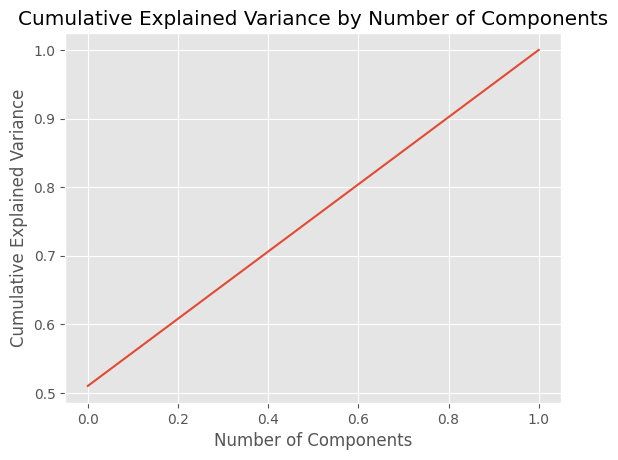

In [59]:

cumulative_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_var)
plt.title('Cumulative Explained Variance by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()


In [60]:
# Defining instance
pca_tuned = PCA(n_components=2)

# Fitting and transforming the model
pca_tuned.fit(X)
x_transformed = pca_tuned.transform(X)

# Checking the shape of transformed matrix
x_transformed.shape

(7770, 2)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Dimensionality reduction is a common technique used to reduce the number of features in a high-dimensional dataset while preserving most of the important information in the original data. One such widely used technique for dimensionality reduction is PCA (Principal Component Analysis).

We have used Principle Component Analysis as the key aim of PCA is to reduce the number of variables of a data set, while preserving as much information as possible. change this sentence

### 8. Data Splitting

In [61]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [62]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1  (K-Means Clustering)

In [63]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Compute Silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=600, tol=0.000001)
    clusters = kmeans_model.fit_predict(X)
    score = silhouette_score(X, clusters)
    silhouette_scores.append(score)

# Construct a DataFrame to store the results
temp = pd.DataFrame({'n_clusters': range(2, 11), 'silhouette_score': silhouette_scores})

# Sort the DataFrame by the Silhouette score
temp = temp.sort_values(by='silhouette_score', ascending=False)

# Print the top 15 results
temp.head(15) 




n_clusters  silhouette_score
2           4          0.447615
1           3          0.434986
5           7          0.432028
4           6          0.427736
6           8          0.420102
3           5          0.417751
8          10          0.397793
0           2          0.394561
7           9          0.392408

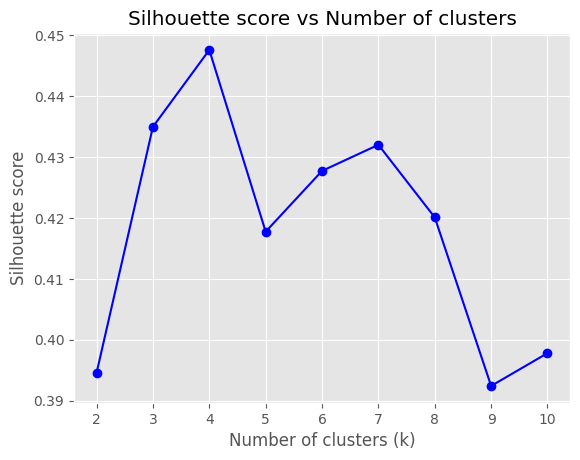

In [64]:
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette score')
plt.title('Silhouette score vs Number of clusters')
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [66]:
# Evaluate the silhouette score :
score = silhouette_score(X, clusters)
print("Silhouette score is {}".format(score))

Silhouette score is 0.3977927074256244


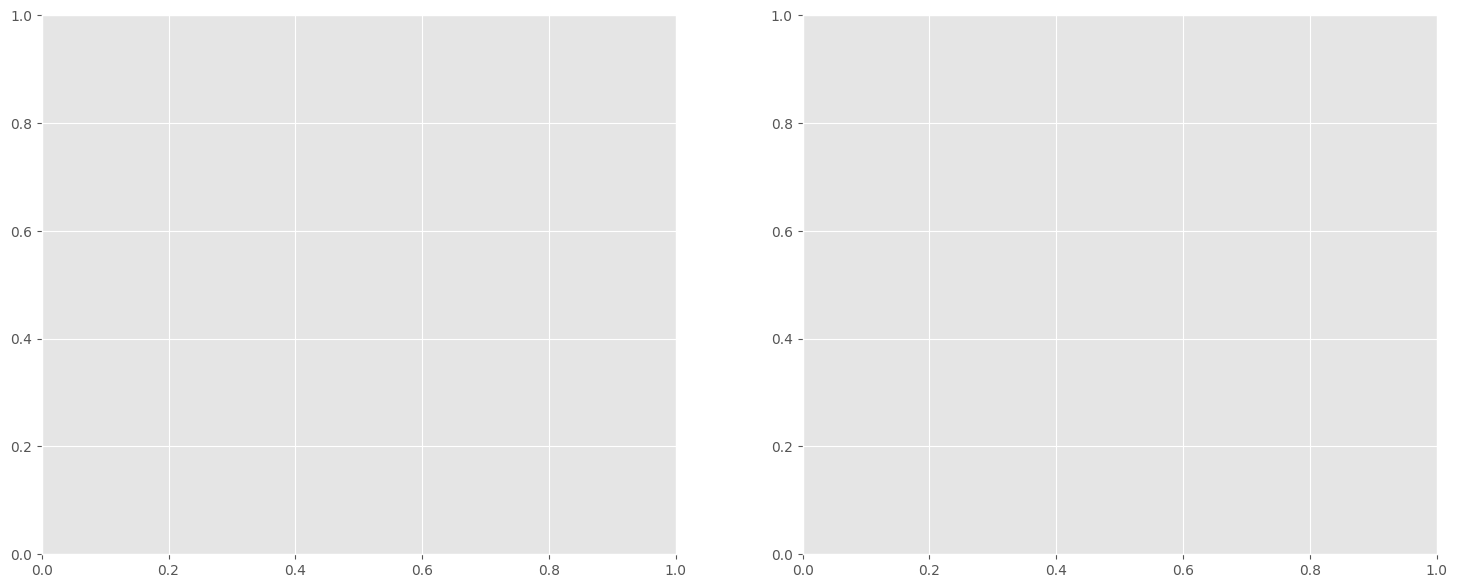

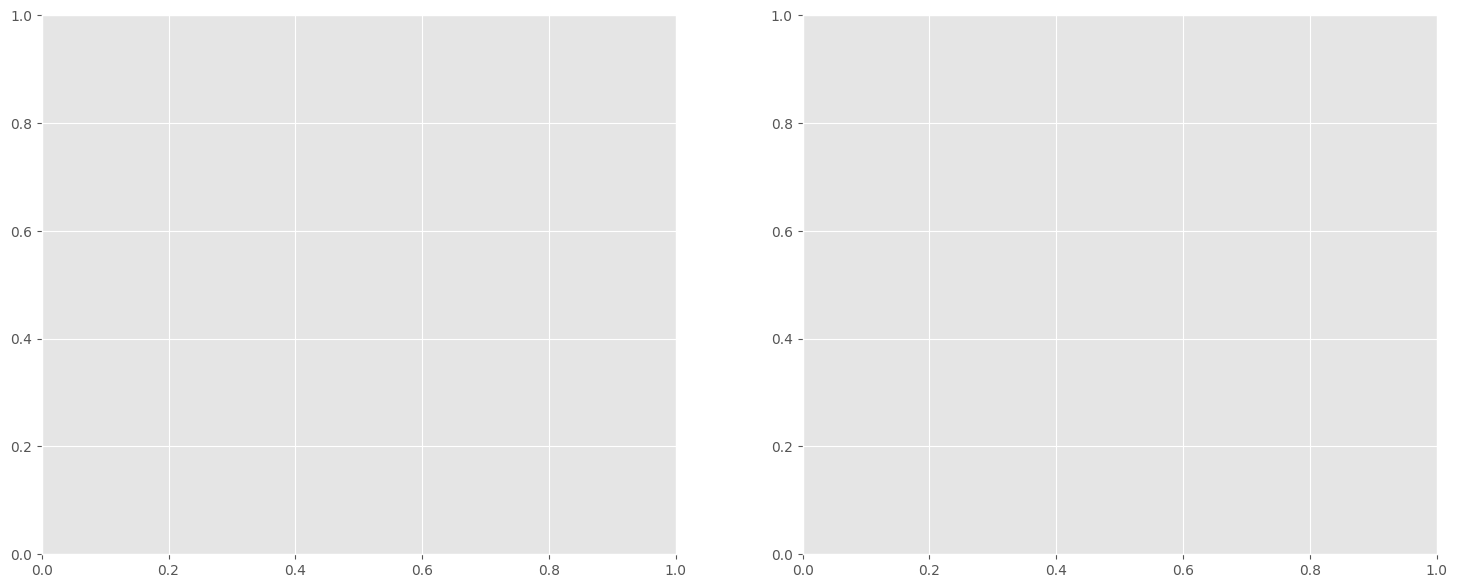

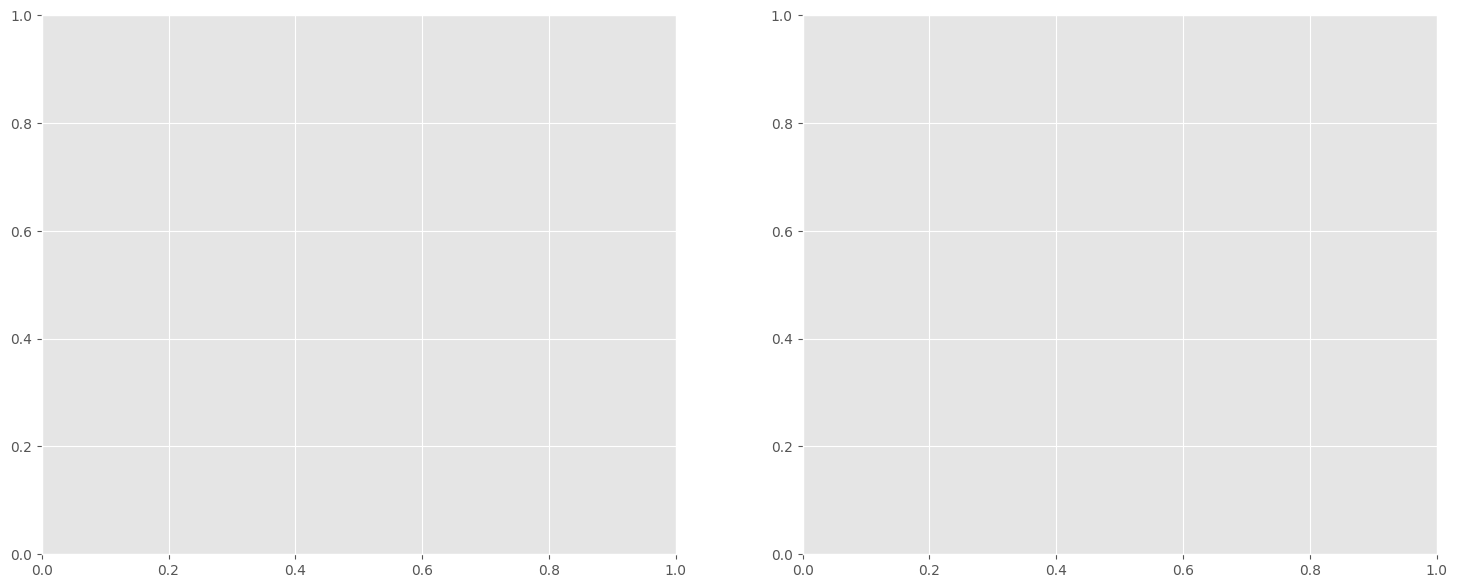

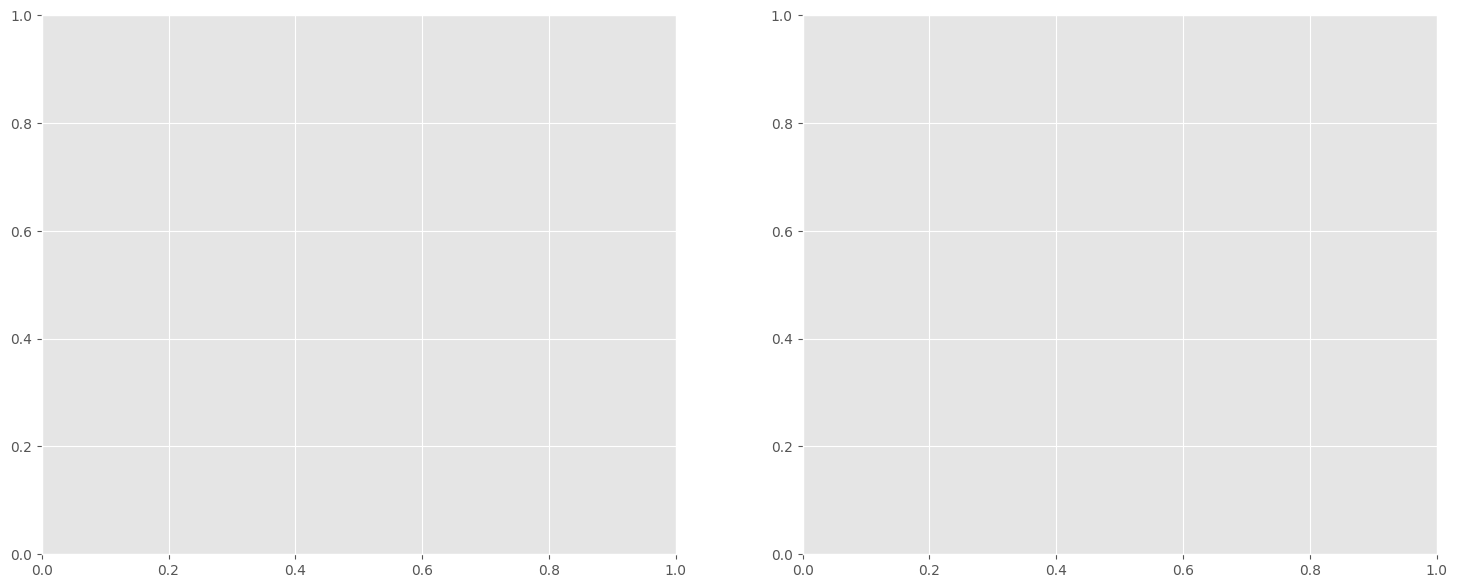

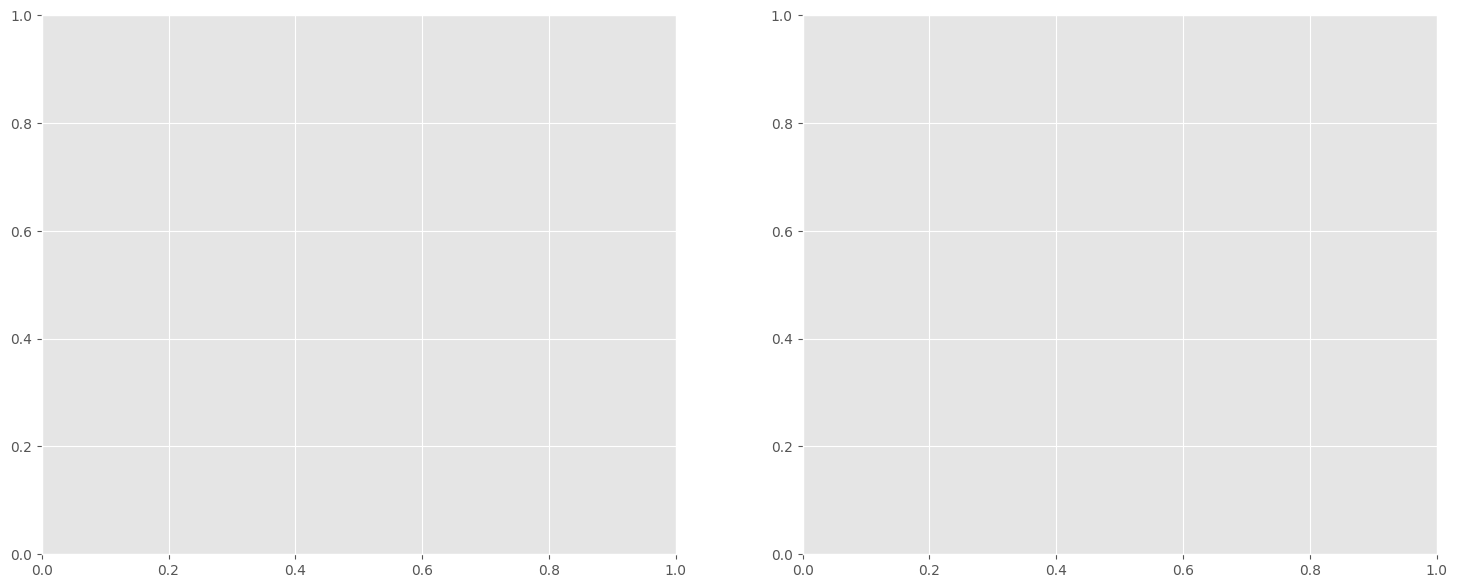

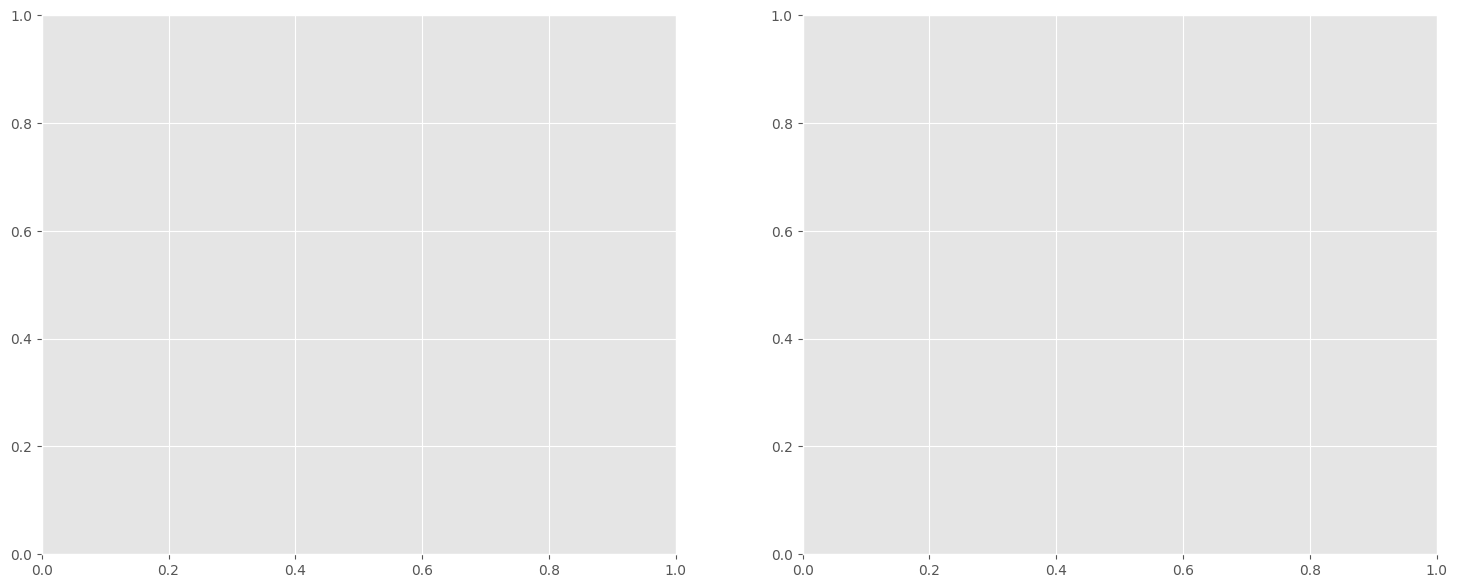

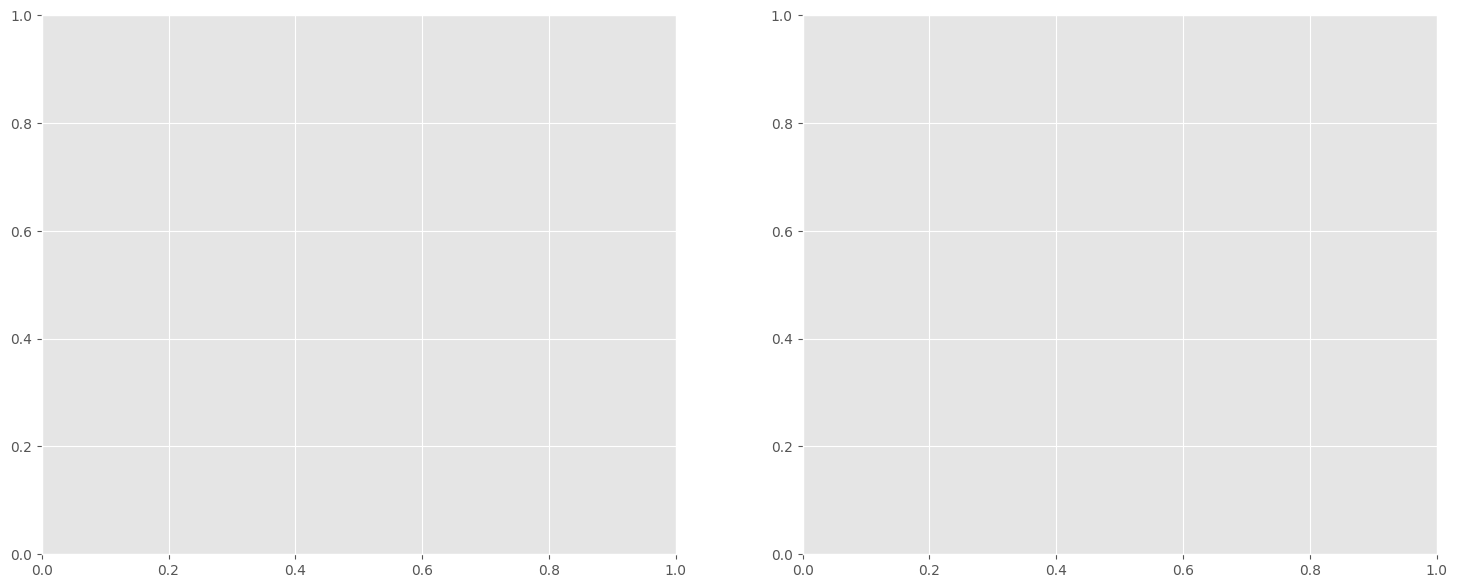

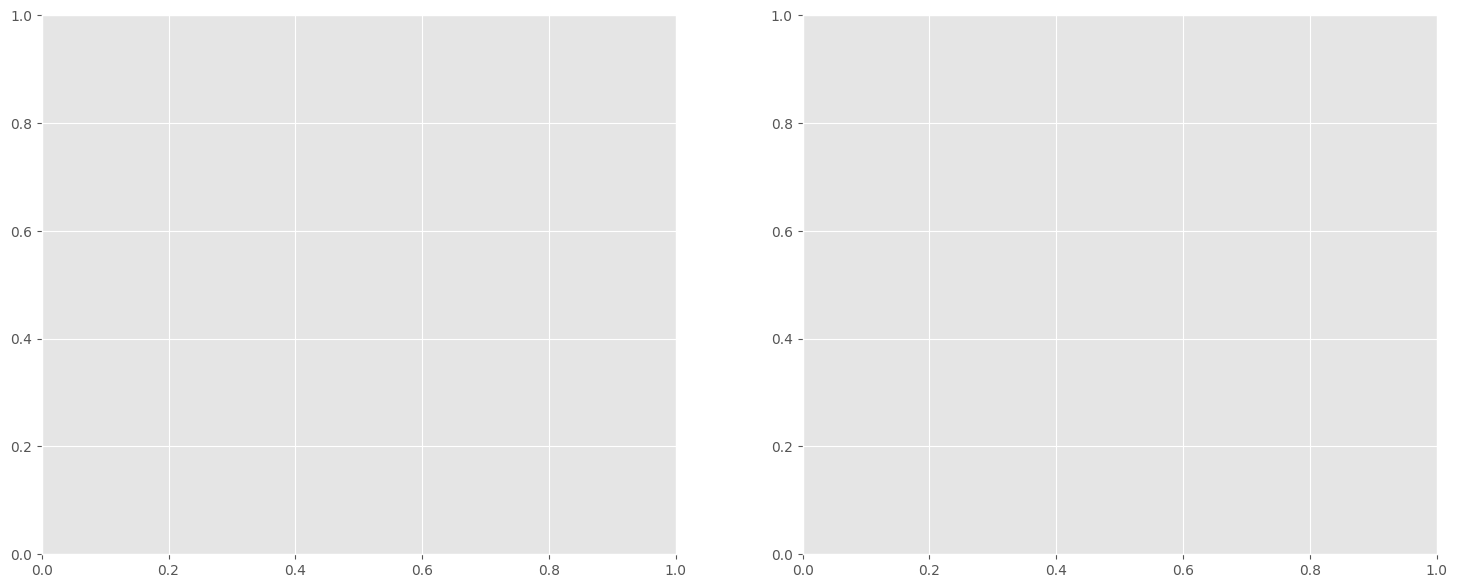

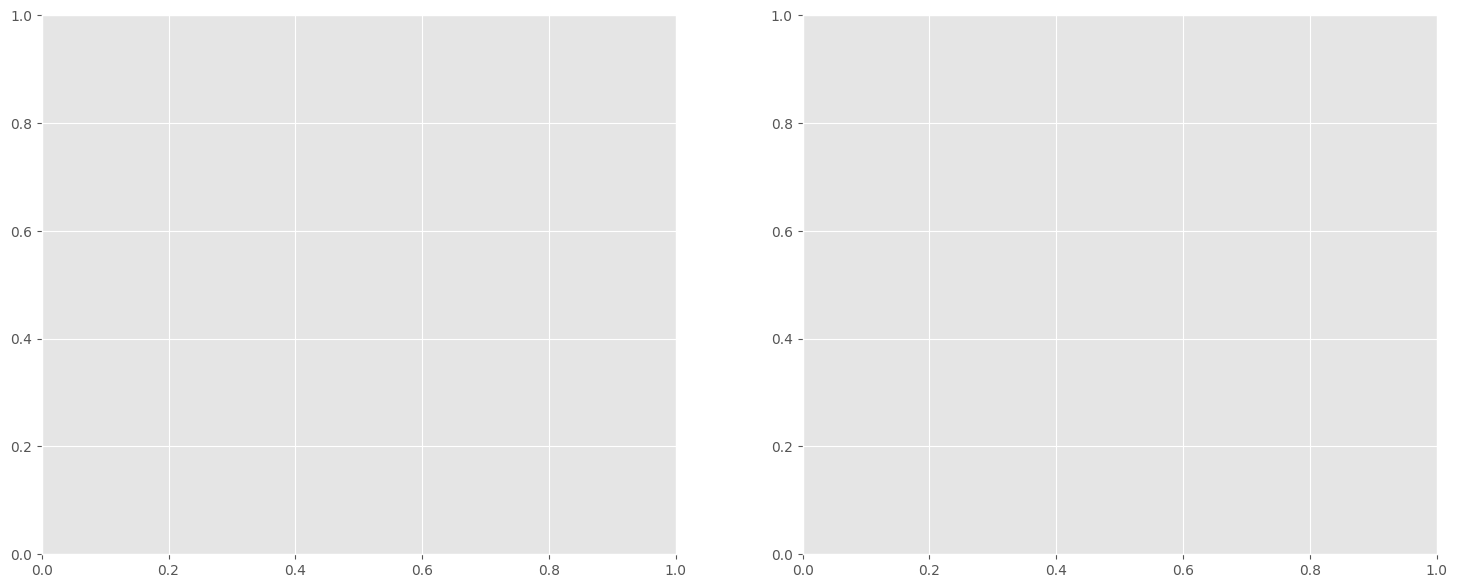

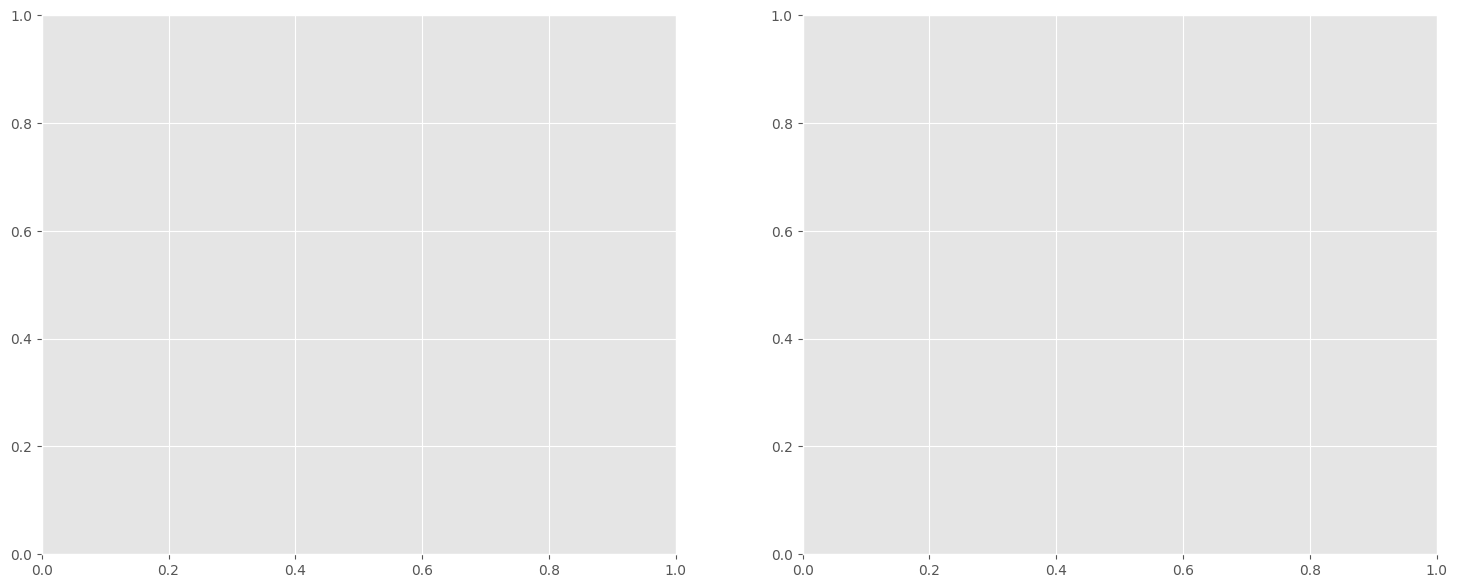

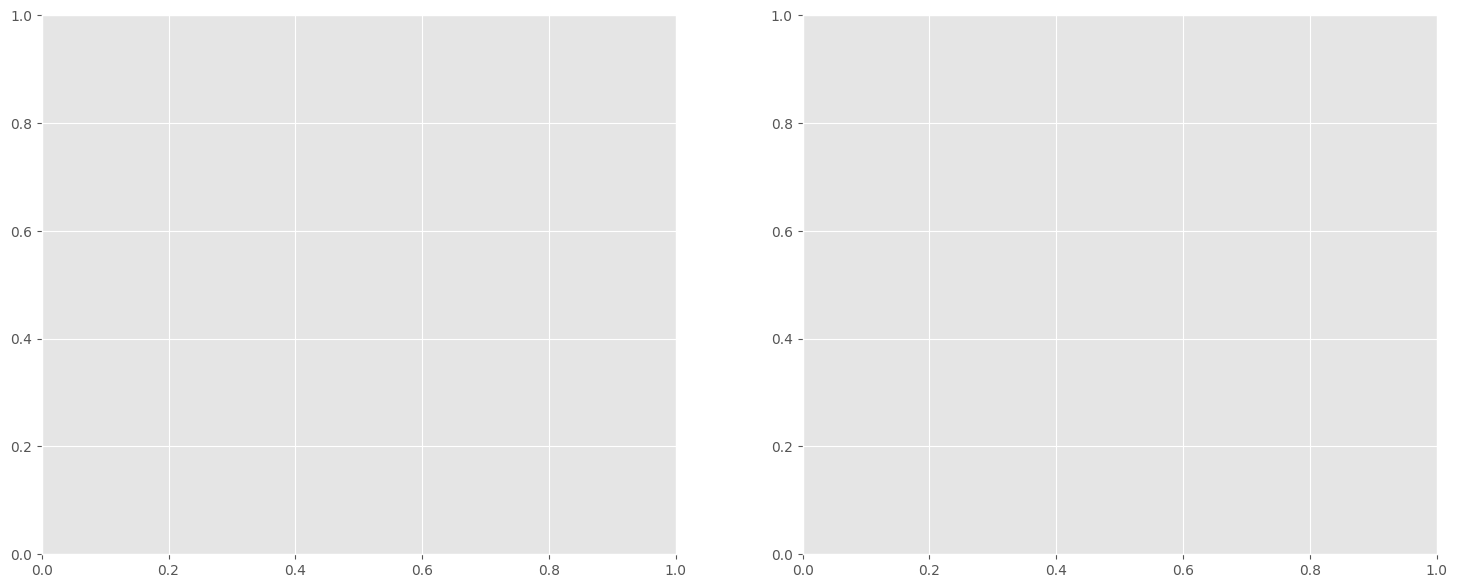

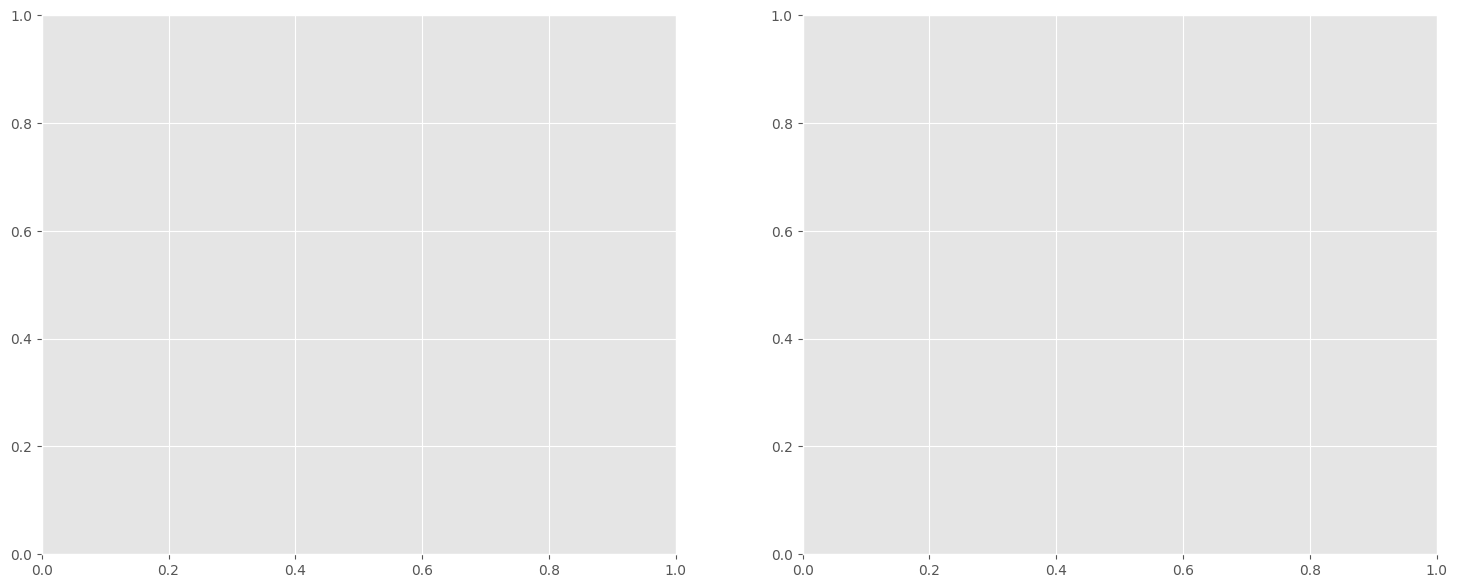

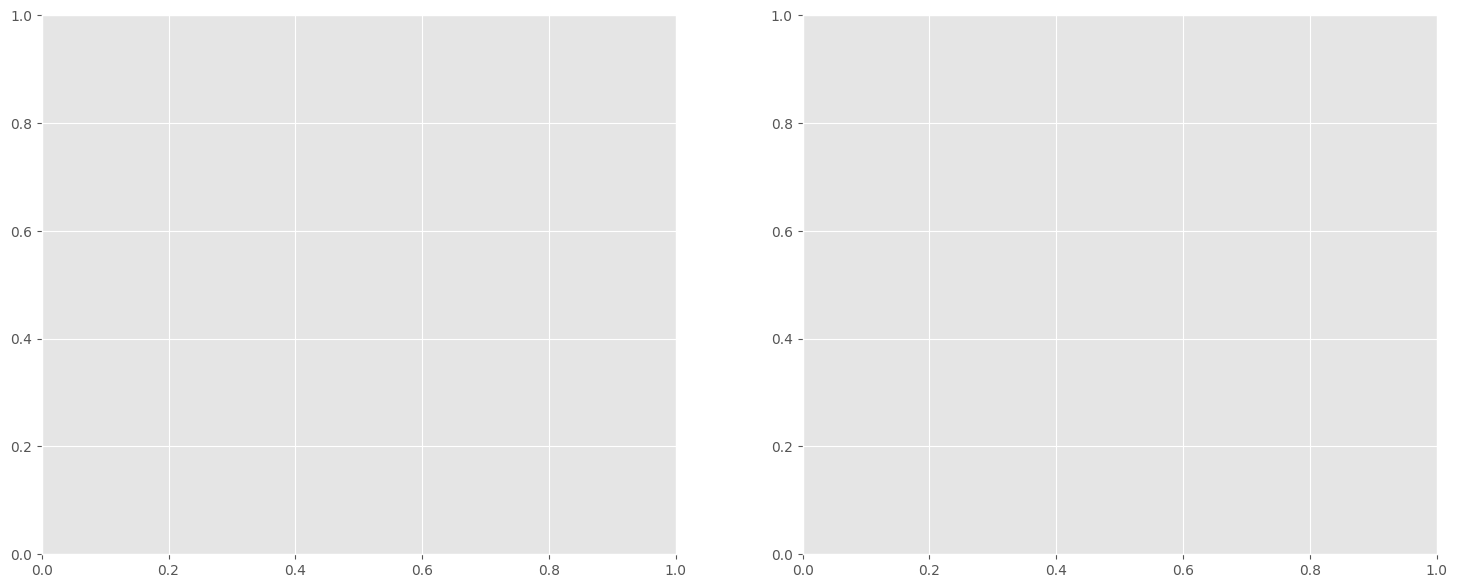

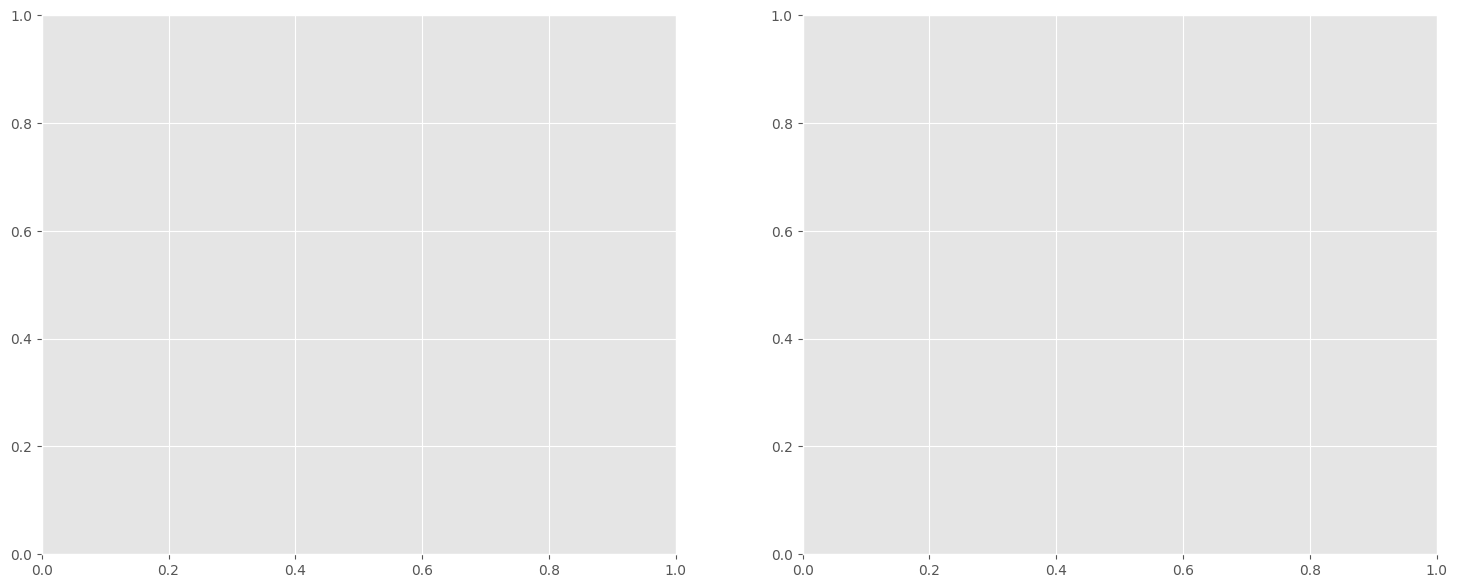

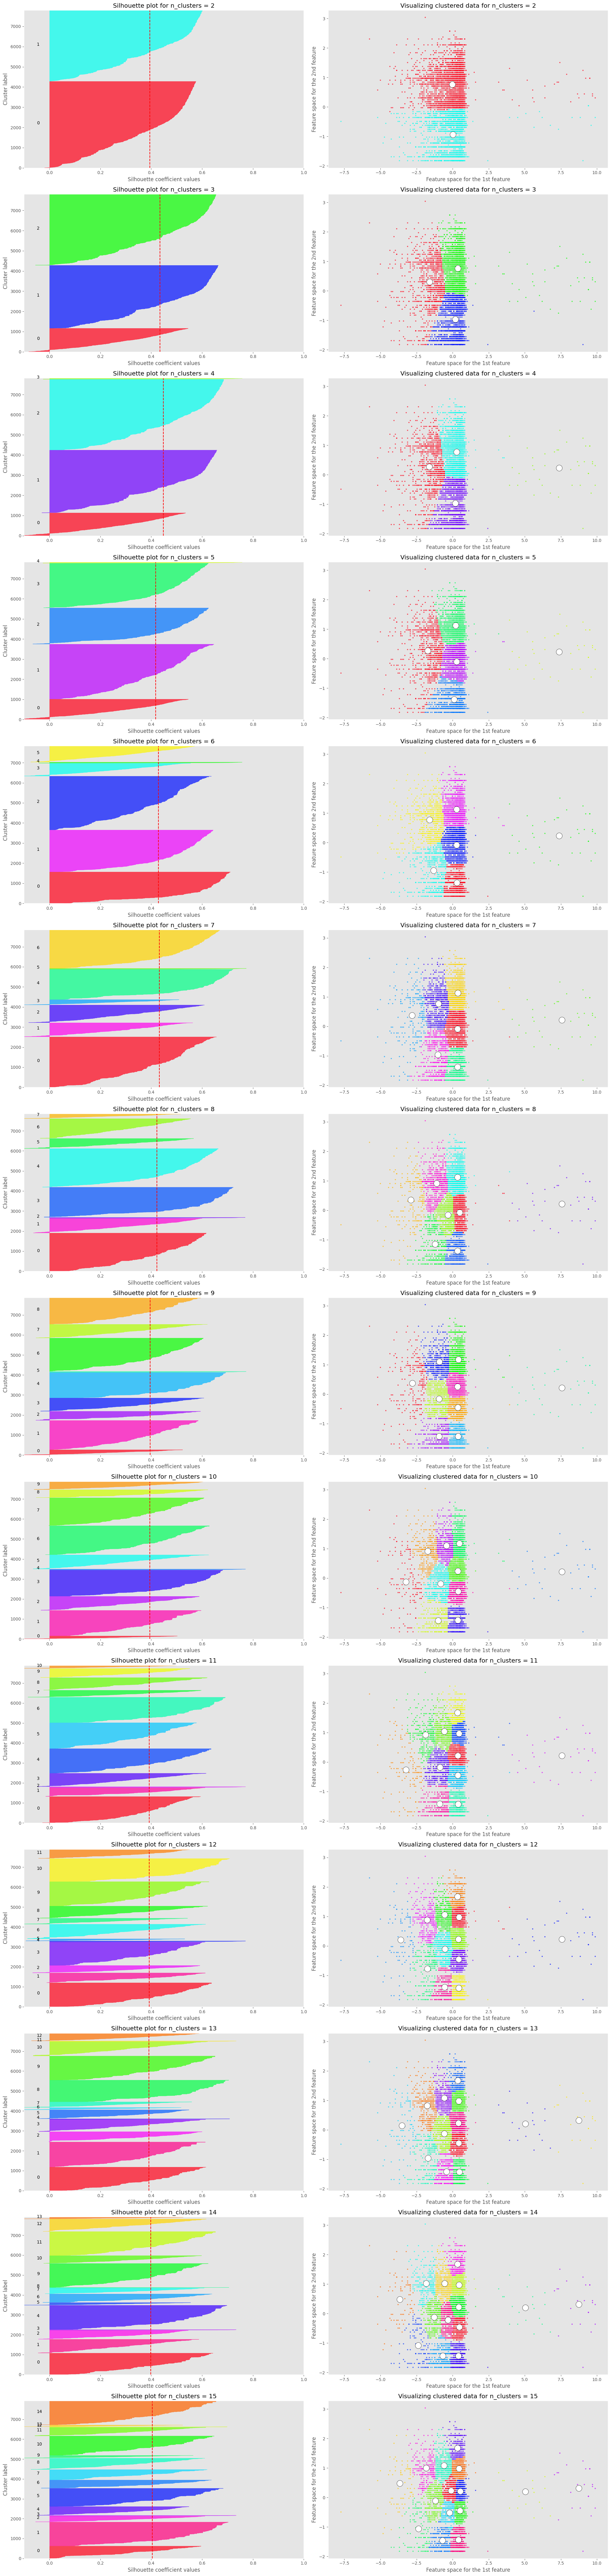

In [67]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from matplotlib import cm

range_n_clusters = [i for i in range(2,16)]
colors = ['#8dd3c7', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd']

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns :
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
range_n_clusters = range(2, 16)

fig, axs = plt.subplots(nrows=len(range_n_clusters), ncols=2, figsize=(20, 6*len(range_n_clusters)))

for idx, n_clusters in enumerate(range_n_clusters):
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # Compute the silhouette score and sample silhouette values for each sample
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Plot the silhouette scores
    axs[idx, 0].set_xlim([-0.1, 1])
    axs[idx, 0].set_ylim([0, len(X) + (n_clusters + 1) * 10])
    axs[idx, 0].set_title("Silhouette plot for n_clusters = {}".format(n_clusters))
    axs[idx, 0].set_xlabel("Silhouette coefficient values")
    axs[idx, 0].set_ylabel("Cluster label")

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.hsv_r(float(i) / n_clusters)
        axs[idx, 0].fill_betweenx(np.arange(y_lower, y_upper),
                                  0, ith_cluster_silhouette_values,
                                  facecolor=color, edgecolor=color, alpha=0.7)
        axs[idx, 0].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    axs[idx, 0].axvline(x=silhouette_avg, color="red", linestyle="--")
    axs[idx, 0].grid(False)

    # Plot the actual clusters
    colors = cm.hsv_r(cluster_labels.astype(float) / n_clusters)
    axs[idx, 1].scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = clusterer.cluster_centers_
    axs[idx, 1].scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    axs[idx, 1].set_title("Visualizing clustered data for n_clusters = {}".format(n_clusters))
    axs[idx, 1].set_xlabel("Feature space for the 1st feature")
    axs[idx, 1].set_ylabel("Feature space for the 2nd feature")
    axs[idx, 1].grid(False)

plt.tight_layout()
plt.show()


### **ML Model - 2    (Elbow Curve)**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

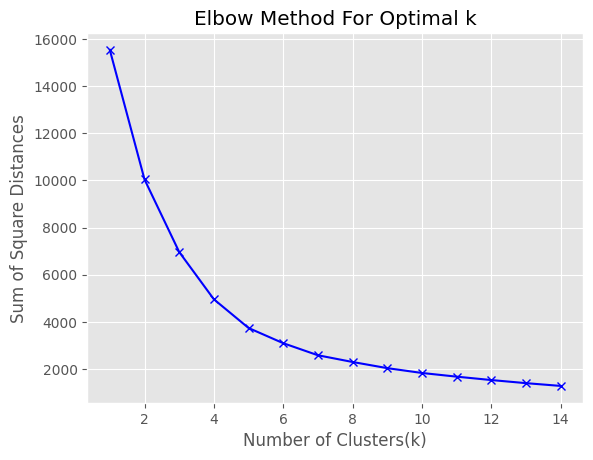

In [71]:
# ML Model - 2 Implementation
inertias = []
range_n_clusters = range(1, 15)

for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=1000)
    km.fit(X)
    inertias.append(km.inertia_)

# Plot the graph for the sum of square distance values and Number of Clusters :

plt.plot(range_n_clusters, inertias, 'bx-' , color="Blue")
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [72]:
# ML Model - 2 Implementation
kmeans = KMeans(n_clusters = 6 )
# fit the model
kmeans.fit(X)
# predict on the model
y_kmeans= kmeans.predict(X)

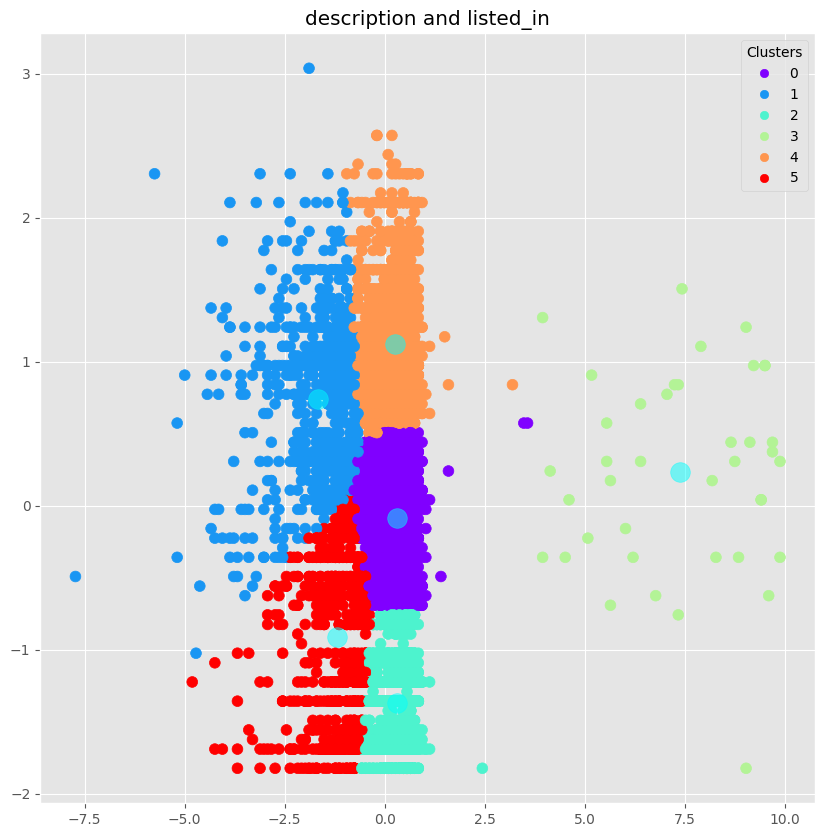

In [90]:
# Visualizing evaluation Metric Score chart
fig, ax = plt.subplots(figsize=(10,10))
ax.set_title('description and listed_in')
scatter = ax.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=60, cmap='rainbow')
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='cyan', s=200, alpha=0.5)
ax.legend(*scatter.legend_elements(), loc="upper right", title="Clusters")
plt.show()


Although K-means clustering produced a silhouette score of 0.45 for 4 clusters, we ultimately decided to choose 6 clusters as the optimal number after conducting elbow curve cross-validation.

### ML Model - 3    (Hierarchial Clustering)

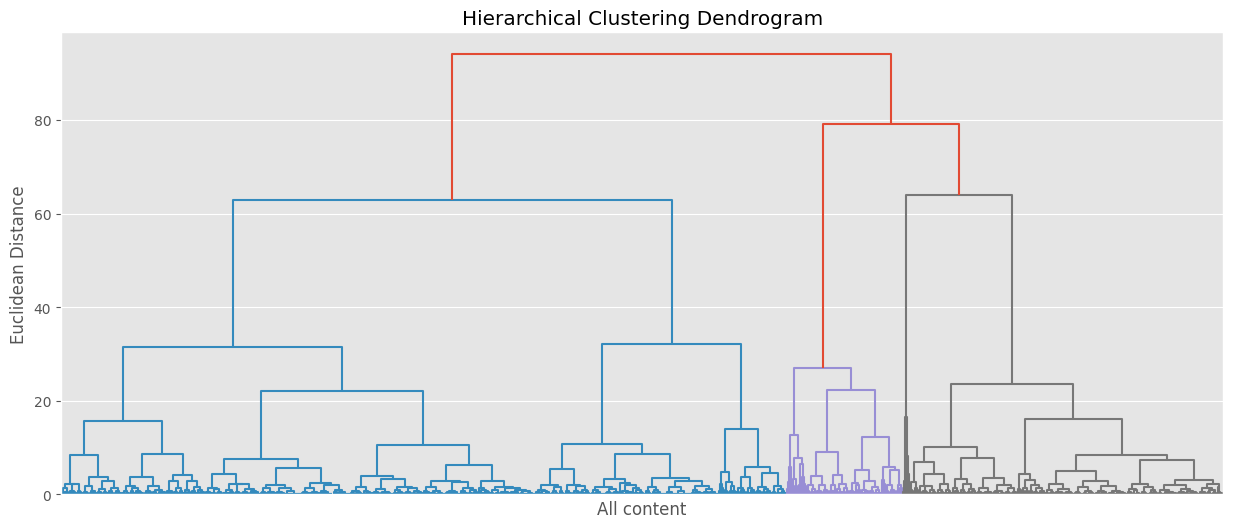

In [97]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# HIERARCHICAL CLUSTERING
Z = sch.linkage(x_transformed, method='ward', metric='euclidean')

# DENDROGRAM VISUALIZATION
plt.figure(figsize=(15, 6))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All content')
plt.ylabel('Euclidean Distance')
sch.dendrogram(Z, no_labels=True)
plt.show()






*  A dendrogram is a diagram that shows how clusters are merged or split, with longer vertical lines indicating greater distances between clusters.
*  Based on the dendrogram above, it appears that the optimal number of clusters for the dataset is 5. However, to confirm this, we will use agglomerative clustering and the bottom-up approach to aggregate the data points and calculate the silhouette scores before assigning them to their respective clusters.



In [99]:
# Import libraries
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Define range of cluster numbers
k_range = range(2, 10)

# Calculate and print silhouette scores for each k
for k in k_range:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(x_transformed)
    score = silhouette_score(x_transformed, labels)
    print(f'Agglomerative clustering with {k} clusters: silhouette score = {score:.3f}')


Agglomerative clustering with 2 clusters: silhouette score = 0.370
Agglomerative clustering with 3 clusters: silhouette score = 0.394
Agglomerative clustering with 4 clusters: silhouette score = 0.389
Agglomerative clustering with 5 clusters: silhouette score = 0.404
Agglomerative clustering with 6 clusters: silhouette score = 0.394
Agglomerative clustering with 7 clusters: silhouette score = 0.397
Agglomerative clustering with 8 clusters: silhouette score = 0.400
Agglomerative clustering with 9 clusters: silhouette score = 0.371


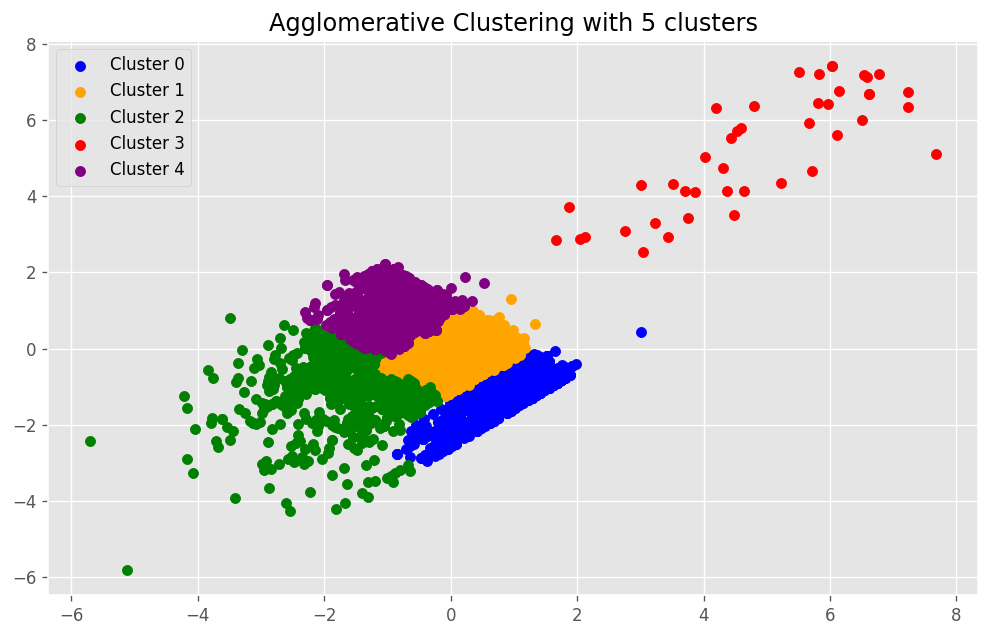

In [100]:
# Train the agglomerative clustering model
from sklearn.cluster import AgglomerativeClustering

n_clusters = 5
model = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
labels = model.fit_predict(x_transformed)

# Plot the results
import matplotlib.pyplot as plt
import numpy as np

unique_labels = np.unique(labels)
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

plt.figure(figsize=(10, 6), dpi=120)
for i, label in enumerate(unique_labels):
    plt.scatter(x_transformed[labels == label, 0], x_transformed[labels == label, 1], label=f'Cluster {label}', color=colors[i % len(colors)])
plt.title(f'Agglomerative Clustering with {n_clusters} clusters')
plt.legend()
plt.show()


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [115]:
# Visualizing evaluation Metric Score chart
def agglomerative_wordcloud(cluster_number, column_name):
  '''function for Building a wordcloud for the movie/shows'''

  #Importing libraries
  from wordcloud import WordCloud, STOPWORDS

  # Filter the data by the specified cluster number and column name
  df_wordcloud = New_data[['agglomerative_cluster', column_name]].dropna()
  df_wordcloud = df_wordcloud[df_wordcloud['agglomerative_cluster'] == cluster_number]
  
  # Combine all text documents into a single string
  text = " ".join(word for word in df_wordcloud[column_name])
  
  # Create the word cloud
  wordcloud = WordCloud(stopwords=set(STOPWORDS), background_color="black").generate(text)
  
  # Return the word cloud object
  return wordcloud

In [ ]:
# Implementing the above defined function and plotting the wordcloud of each attribute
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))
for i in range(2):
    for j, col in enumerate(['description', 'listed_in', 'country', 'title']):
        axs[j][i].imshow(agglomerative_wordcloud(i, col))
        axs[j][i].axis('off')
        axs[j][i].set_title(f'Cluster {i}, {col}',fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### **ML Model - 4    ( Recommendaton System)**

We have chosen to use Cosine similarity because it can measure the similarity between two vectors in a high-dimensional space. It is computed as the cosine of the angle between the two vectors, which ranges from -1 (for opposite directions) to 1 (for the same direction), while 0 means that the vectors are orthogonal (perpendicular to each other).

Cosine similarity is being used instead of tf-idf because it is better suited for high-dimensional sparse data. Additionally, cosine similarity captures the semantic similarity between texts more accurately compared to tf-idf. This is evident in cases where two texts have similar words, but in different orders; cosine similarity will still consider them similar, while tf-idf may not because it only takes into account the frequency of words in a document, not their semantic meaning or order.

In [206]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline

pipe = Pipeline([('cv', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer())]).fit(df['description'])

print("CountVectorizer_matrix: {}".format(pipe['cv'].transform(df['description']).toarray()))
print("TfidfTransformer_matrix: {}".format(pipe['tfidf'].idf_))


CountVectorizer_matrix: [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
TfidfTransformer_matrix: [6.40280607 8.34871622 9.26500695 ... 9.26500695 9.26500695 9.26500695]


In [199]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [200]:
programme_list=df['title'].to_list()

In [201]:
def recommend(title, similarity_matrix):
    # Find the index of the programme in the list
    title_index = programme_list.index(title)
    # Get the similarity scores between the programme and all other programmes
    similarity_scores = list(enumerate(similarity_matrix[title_index]))
    # Sort the similarity scores in descending order and select the top 10 (excluding the programme itself)
    top_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)[1:11]
    # Get the indices of the top recommended programmes
    recommended_indices = [i[0] for i in top_scores]
    # Get the titles and scores of the recommended programmes
    recommended_titles = df['title'].iloc[recommended_indices]
    recommended_scores = [round(i[1], 4) for i in top_scores]
    # Create a dataframe with the recommended programmes and their similarity scores
    recommendations_df = pd.DataFrame(list(zip(recommended_titles, recommended_scores)), columns=['Recommended programme', 'Similarity score'])
    return recommendations_df


In [198]:
recommend('3 Idiots', cosine_similarity_matrix)


Recommended programme  Similarity score
0                    PK            0.3541
1       Rang De Basanti            0.2157
2                 Sanju            0.1972
3    Ek Main Aur Ekk Tu            0.1964
4     War Chhod Na Yaar            0.1869
5                   Dil            0.1725
6    For Here or to Go?            0.1613
7        Dil Chahta Hai            0.1536
8       Andaz Apna Apna            0.1513
9      Taare Zameen Par            0.1454

In [203]:
recommend('Sanju' , cosine_similarity_matrix)

Recommended programme  Similarity score
0                               PK            0.2739
1                         3 Idiots            0.1972
2                     Lust Stories            0.1713
3                  Andaz Apna Apna            0.1559
4             Haseena Maan Jaayegi            0.1552
5               Dharam Sankat Mein            0.1521
6                            Anwar            0.1509
7                     Chup Chup Ke            0.1494
8                  The Zoya Factor            0.1489
9  Ek Ladki Ko Dekha Toh Aisa Laga            0.1455

In [204]:
recommend('Vampires',cosine_similarity_matrix)

Recommended programme  Similarity score
0              The World Is Yours            0.1573
1                       Immortals            0.1226
2                         Divines            0.1181
3  Chilling Adventures of Sabrina            0.1126
4                        Real Rob            0.1107
5                           Balto            0.1060
6                        Dinotrux            0.1013
7                         Vroomiz            0.0968
8              The Little Vampire            0.0961
9                         Dracula            0.0910

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The Silhouette Score is a preferable evaluation metric over Distortion Score for cluster analysis, because it considers how well each data point is separated from other clusters, rather than just the sum of squared distances within a cluster. The Silhouette Score ranges from -1 to 1, where higher values indicate better cluster separation. A score close to 1 implies that a data point is well-matched to its own cluster and poorly matched to neighboring clusters. A score close to 0 implies that a data point is on or very close to the boundary between two clusters. A score close to -1 implies that a data point is likely assigned to the wrong cluster.



*   One of the main advantages of using the Silhouette Score as an evaluation metric over the Distortion Score is that it considers both the cohesion and separation of the clusters. Cohesion refers to how well the data points within a cluster are similar, while separation refers to how well the data points in different clusters are dissimilar. In contrast, the Distortion Score only measures the compactness of each cluster. By accounting for both cohesion and separation, the Silhouette Score provides a more comprehensive assessment of the quality of the clustering results.

*   Another advantage of the Silhouette Score as an evaluation metric is that it is less sensitive to the shape of the clusters compared to the Distortion Score. The Distortion Score tends to favor spherical clusters, which may not always be appropriate for all datasets, particularly those with non-spherical or irregularly shaped clusters.



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Our final choice for the clustering model is K-means, primarily due to the relatively high Silhouette Score that we obtained through this algorithm. Additionally, we have observed that the resulting clusters are well-separated from one another in the 3 dimensions. Therefore, we believe that K-means is the most appropriate choice for clustering our data and obtaining meaningful insights from it.

Additionally, K-means performs better than alternative clustering techniques in specific circumstances, including:

*  When it comes to clustering large datasets, K-means is often faster than hierarchical clustering due to its reduced number of calculations and iterations. As a result, K-means is generally preferred over hierarchical clustering for datasets that require a high degree of computational efficiency.
*  K-means clustering is known for its ease of implementation and interpretation, as it involves minimal parameter tuning and produces a well-defined partition of the data into clusters. This simplicity makes K-means an accessible clustering algorithm for a wide range of users, from researchers and data scientists to business analysts and decision-makers.




* scalability, K-means is well-suited for datasets with a large number of variables or dimensions, as it is capable of handling such datasets with relative ease. On the other hand, hierarchical clustering becomes increasingly computationally expensive as the number of data points and dimensions increase, making it less suitable for large and complex datasets. Therefore, K-means is often preferred over hierarchical clustering for scalability reasons, particularly when dealing with high-dimensional data.
*  K-means generates separate clusters, while hierarchical clustering can create clusters that overlap or contain each other, which may not be appropriate for all use cases.





### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

**Conclusions drawn from EDA**


*  The Netflix dataset contains a larger percentage of movies (70%) compared to TV shows (30%).
* The most popular Netflix genres are adult and teen, with family-friendly content being more frequent in TV episodes than in films.
*  The majority of Netflix movies use Indian actors, yet there are no well-known Indian actors in the TV shows.
*   The director who appears most frequently in Netflix movies is Jan Suter, whereas Ken Burns is the most frequent director of TV shows on the platform.

* The majority of Netflix movies' genres are documentaries, whereas the most popular category for Netflix TV series is kids TV.


*  The country with the most content on Netflix is the United States, with India coming in second. India has a higher number of movie productions than TV shows, while Japan and South Korea have more TV show productions than movies.

*  The trend in Netflix content has been a significant increase in the number of TV shows since 2018, accompanied by a decline in the number of movies. Additionally, the number of movies added in 2020 was lower compared to 2019, while the number of TV shows added in 2020 was higher than in 2019.
* The data suggests that the months of October, November, and December are popular for adding TV shows, and January, October, and November are the popular months for adding movies to Netflix. Conversely, February appears to be the least popular month for adding both movies and TV shows.

*   Most movies on Netflix typically run for 80 to 120 minutes, while for TV shows, the most frequent duration is one season, with two seasons being the next most common duration.

*  The most often used terms in the description column are family, life, find, and love



*   Adult and teen categories are the most commonly produced content categories across many countries on Netflix. In comparison to other countries, India produces relatively fewer adult content but has a substantial number of teen content. Spain is the leading country in terms of adult content production, while Canada has a greater focus on children and family-friendly content.


*   **Conclusions drawn from ML Model**



*   We have implimented 4 models for ML
  * K-means clustering 
  * Elbow curve
  * Hierarchical clustering
  *  Recommendaton System



*   Although K-means clustering suggested '4' as the optimal number of clusters with a silhouette score of 0.45, we ultimately decided to select '6' as the optimum cluster number based on cross-validation with the elbow curve method.
*  K-means clustering suggests that the ideal number of clusters is 4 with a silhouette score of 0.45, while Agglomerative Hierarchical Clustering indicates that 2 clusters would be optimal. 

*   A personalized recommendation system has been developed to assist Netflix in enhancing user satisfaction and decreasing subscriber turnover by recommending content based on the similarity scores of users.












### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***